## **Haruna Jalllow**



**Title: Predictive Modeling for Disease Diagnosis**

**Author**: [Haruna Jallow](https://www.https://www.linkedin.com/in/haruna-jallow-3b17901b7/)\
**Date**: 17.May.2024\
`**Dataset**: [Disease health-related attributes](Datasets where given to me by Mentorness for my Mentorness Internship Progrom)

**`About Me:** : My name is Haruna Jallow, I am a MSc Data Sicence Candidate and i am currently taking one month Internship with Mentorness Group from Indai ."With a solid foundation in Data Science and over three years of hands-on experience, I excel in leveraging data to streamline business operations and enhance efficiency. Proficient in Python, SQL, R, and LaTeX, I bring robust skills in data visualization, predictive modelling, and strategic analysis. My background as a youth activist and leader has sharpened my administrative skills and reinforced my commitment to institutional goals. I am passionate about transforming data into compelling stories that inform strategies and solutions, ensuring data becomes a cornerstone of actionable insights and strategic direction. Join me in exploring the intersection of technology and data, unlocking new horizons in data-driven innovation!"


## **Supervised Machine Learning on Disease Prediction**

**Task Highlights**:

Develop a predictive Supervised Machine Learning model on Disease Prediction dataset given to me by Mentorness Internship Program as an Intern of the program.

1. Perform data visualization
2. Make use of algorithm(s) to predict target label
3. Evaluate the models’ performance by using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score

The ultimate goal is to develop a robust predictive model that can assist healthcare professionals in early disease detection and patient management. By accurately identifying individuals at risk of certain diseases, interventions can be initiated promptly, potentially improving patient outcomes and reducing healthcare costs.

This task will use datasets provided by the Mentorness Internship Program. The data mining and modelling process, the popular classifier models of Decision Tree, Random Forest, XBG Classifier and Multilayer Perceptron Neural Network will be fitted, analysed, and evaluated in terms of the performance metrics of accuracy, precision, recall, and F1-score in predicting the classifications of disease.

Following the purpose of this task, the primary focus will be on disease-related factors, which are a range of symptoms represented 0 for 'Non-Diseased' and 1 for 'Diseased'. Analysing these will help to identify concern areas and predict the disease prognosis.</h3>


<a id="1a"></a>
<h3 style="background-color:White;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Libraries And Utilities</h3>

In [1]:
# to visualize the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from matplotlib import pyplot
from pylab import rcParams
from plotly import tools
import plotly.graph_objs as go
import plotly.figure_factory as ff
import seaborn as sns
import lightgbm as lgb
from numpy.random import normal, seed
from pandas.plotting import autocorrelation_plot
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.preprocessing import QuantileTransformer , PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB , BernoulliNB , MultinomialNB
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier ,RandomForestRegressor , AdaBoostRegressor
from xgboost import XGBClassifier , XGBRegressor
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor , KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor , GradientBoostingClassifier
from sklearn.svm import SVC , SVR
from xgboost import XGBClassifier , XGBRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.utils import check_random_state

#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
import xgboost as xgb

#import grid search cv for cross validation
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

# machine learning
from sklearn.preprocessing import KBinsDiscretizer
import tensorflow as tf
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import Sequential, layers, callbacks
from keras.layers import Dense, LSTM, Dropout, Bidirectional
import math

# from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score
#metrics
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score , classification_report , accuracy_score , f1_score , precision_score


# ignore warnings   
import warnings
warnings.filterwarnings('ignore')
import pickle

<a id="1b"></a>
<h3 style="background-color:White;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Load Data</h3>

In [2]:
# load the data from csv file placed locally in our pc
ed_train = pd.read_csv('Train_data.csv')
ed_test = pd.read_csv('test_data.csv')

In [3]:
# print the first 5 rows of the dataframe
ed_train.head()

Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.739597     0.650198    0.713631   0.868491           0.687433   
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.529895    0.290006                 0.631045   
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.001328                                   0.795829   
1                     0.207938                                   0.505562   
2                     0.868369                                   0.026808   
3                     0.125447                                   0.501051   
4                     0.257288                                   0.805987   

   ...     HbA1c  LDL Cholesterol  HDL Cholesterol       ALT       AST  \
0  ...  0.502665         0.215560         0.512941  0.064187  0.610827   
1  ...  0.856810         0.652465         0.106961  0.942549  0.344261   
2  ...  0.466795         0.387332         0.421763  0.007186  0.506918   
3  ...  0.016256         0.040137         0.826721  0.265415  0.594148   
4  ...  0.429431         0.146294         0.221574  0.015280  0.567115   

   Heart Rate  Creatinine  Troponin  C-reactive Protein   Disease  
0    0.939485    0.095512  0.465957            0.769230   Healthy  
1    0.666368    0.659060  0.816982            0.401166  Diabetes  
2    0.431704    0.417295  0.799074            0.779208  Thalasse  
3    0.225756    0.490349  0.637061            0.354094    Anemia  
4    0.841412    0.153350  0.794008            0.094970  Thalasse  

[5 rows x 25 columns]

In [4]:
# print the first 5 rows of the dataframe
ed_test.head()

Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.001827     0.033693    0.114755   0.997927           0.562604   
1  0.436679     0.972653    0.084998   0.180909           0.675736   
2  0.545697     0.324815    0.584467   0.475748           0.558596   
3  0.172994     0.050351    0.736000   0.782022           0.069435   
4  0.758534     0.739968    0.597868   0.772683           0.875720   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.866499    0.578042                 0.914615   
1         0.563889    0.798382                 0.670361   
2         0.661007    0.934056                 0.381782   
3         0.085219    0.032907                 0.460619   
4         0.860265    0.486189                 0.486686   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.026864                                   0.038641   
1                     0.376092                                   0.184890   
2                     0.500342                                   0.531829   
3                     0.785448                                   0.491495   
4                     0.621048                                   0.191756   

   ...     HbA1c  LDL Cholesterol  HDL Cholesterol       ALT       AST  \
0  ...  0.653230         0.186104         0.430398  0.016678  0.885352   
1  ...  0.833540         0.153001         0.458533  0.401845  0.635969   
2  ...  0.678901         0.220479         0.817151  0.690981  0.101633   
3  ...  0.381500         0.459396         0.420154  0.798537  0.399236   
4  ...  0.993381         0.272338         0.663579  0.265227  0.918847   

   Heart Rate  Creatinine  Troponin  C-reactive Protein   Disease  
0    0.652733    0.788235  0.054788            0.031313  Thalasse  
1    0.574425    0.047025  0.607985            0.594123  Diabetes  
2    0.855740    0.551124  0.413294            0.070909  Heart Di  
3    0.324600    0.499504  0.436662            0.242766  Diabetes  
4    0.804910    0.571119  0.188368            0.750848  Heart Di  

[5 rows x 25 columns]

In [5]:
# return the object type, which is dataframe
print(type(ed_train), type(ed_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


The dataframe format type will facilitate the use of a wider variety of syntax and methods for data analysis, including describe() and info().

Regarding the attributes included in Disease Prediction dataset, there are 25 different disease symptoms, the first 3 recorded being 'Glucose', 'Cholesterol', and 'Hemoglobin'. The target class label is 'Disease'.

<a id="1b"></a>
<h3 style="background-color:White;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Data Preprocessing</h3>

Data preprocessing is a data mining technique that transforms raw data into an understandable format. This process has four main stages – data cleaning, data integration, data transformation, and data reduction.

Data cleaning will filter, detect, and handle dirty data to ensure quality data and quality analysis results. In this case, there may be noises of impossible and extreme values and outliers, and missing values. The errors may include inconsistent data and redundant attributes and data.

As the first step, null values within the dataset will be identified, and appropriately replaced if possible.</h3>


In [6]:
# Some Changes in Target Variable | Only Two Categories (0,1) . 0 for No-Diseased , 1 for Diseased
# Define the category mapping
category_mapping = {
    'Anemia': 1,
    'Healthy': 0,
    'Diabetes': 1,
    'Thalasse': 1,
    'Thromboc': 1
}
# Map the "Disease" column
ed_train['target'] = ed_train['Disease'].map(category_mapping)

# Define the category mapping
category_mapping = {
    'Diabetes': 1,
    'Anemia': 1,
    'Thalasse': 1,
    'Heart Di': 1,
    'Thromboc': 1,
    'Healthy': 0
}
# Map the "Disease" column
ed_test['target'] = ed_test['Disease'].map(category_mapping)

#drip the 'Disease' column after the label encode
ed_train.drop(['Disease'], axis=1, inplace = True)
ed_test.drop(['Disease'], axis=1, inplace = True)

In [7]:
print("="*50)
print("Input Data Information","\n")
print(ed_train.info())

Input Data Information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10 

In [8]:
ed_train.isna().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

Through this, it is found that there are no other null values present in the training dataset. 

In [9]:
print("="*50)
print("Input Data Information","\n")
print(ed_test.info())

Input Data Information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    486 non-null    float64
 1   Cholesterol                                486 non-null    float64
 2   Hemoglobin                                 486 non-null    float64
 3   Platelets                                  486 non-null    float64
 4   White Blood Cells                          486 non-null    float64
 5   Red Blood Cells                            486 non-null    float64
 6   Hematocrit                                 486 non-null    float64
 7   Mean Corpuscular Volume                    486 non-null    float64
 8   Mean Corpuscular Hemoglobin                486 non-null    float64
 9   Mean Corpuscular Hemoglobin Concentration  486 non-null    float64
 10  I

In [10]:
ed_test.isna().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

Through this, it is found that there are no other null values present in the testing dataset. 

In [11]:
ed_train.shape, ed_test.shape

((2351, 25), (486, 25))

The training dataset contains 2351 rows of records and 25 columns of attributes. The data types of the attributes consist of 1 qualitative discrete categorical, and 24 float variables. The memory space usage is at least 459.3+ kilobytes (KB).

The test dataset contains 486 rows of records and 25 columns of attributes. The data types of the attributes consist of 1 qualitative discrete categorical, and 24 float variables. The memory space usage is at least 95.1+ kilobytes (KB).</h3>


In [12]:
# list of all symptoms
#columns = list(edureka_train.columns)
columns_train = sorted(ed_train.columns.unique())
columns_train

['ALT',
 'AST',
 'BMI',
 'C-reactive Protein',
 'Cholesterol',
 'Creatinine',
 'Diastolic Blood Pressure',
 'Glucose',
 'HDL Cholesterol',
 'HbA1c',
 'Heart Rate',
 'Hematocrit',
 'Hemoglobin',
 'Insulin',
 'LDL Cholesterol',
 'Mean Corpuscular Hemoglobin',
 'Mean Corpuscular Hemoglobin Concentration',
 'Mean Corpuscular Volume',
 'Platelets',
 'Red Blood Cells',
 'Systolic Blood Pressure',
 'Triglycerides',
 'Troponin',
 'White Blood Cells',
 'target']

In [13]:
# list of all symptoms
#columns = list(edureka_train.columns)
columns_test = sorted(ed_test.columns.unique())
columns_test

['ALT',
 'AST',
 'BMI',
 'C-reactive Protein',
 'Cholesterol',
 'Creatinine',
 'Diastolic Blood Pressure',
 'Glucose',
 'HDL Cholesterol',
 'HbA1c',
 'Heart Rate',
 'Hematocrit',
 'Hemoglobin',
 'Insulin',
 'LDL Cholesterol',
 'Mean Corpuscular Hemoglobin',
 'Mean Corpuscular Hemoglobin Concentration',
 'Mean Corpuscular Volume',
 'Platelets',
 'Red Blood Cells',
 'Systolic Blood Pressure',
 'Triglycerides',
 'Troponin',
 'White Blood Cells',
 'target']

Through this, it is found that there are no noises of impossible values or errors of inconsistent values.

In [14]:
# detect duplicated records
ed_train[ed_train.duplicated(subset = None, keep = False)]

Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0     0.739597     0.650198    0.713631   0.868491           0.687433   
1     0.121786     0.023058    0.944893   0.905372           0.507711   
2     0.452539     0.116135    0.544560   0.400640           0.294538   
3     0.136609     0.015605    0.419957   0.191487           0.081168   
4     0.176737     0.752220    0.971779   0.785286           0.443880   
...        ...          ...         ...        ...                ...   
2346  0.012956     0.336925    0.451218   0.175006           0.734664   
2347  0.407101     0.124738    0.983306   0.663867           0.361113   
2348  0.344356     0.783918    0.582171   0.996841           0.065363   
2349  0.351722     0.014278    0.898615   0.167550           0.727148   
2350  0.032726     0.053596    0.102633   0.221356           0.153956   

      Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0            0.529895    0.290006                 0.631045   
1            0.403033    0.164216                 0.307553   
2            0.382021    0.625267                 0.295122   
3            0.166214    0.073293                 0.668719   
4            0.439851    0.894991                 0.442159   
...               ...         ...                      ...   
2346         0.382770    0.656463                 0.177502   
2347         0.663716    0.232516                 0.341056   
2348         0.242885    0.658851                 0.543017   
2349         0.046091    0.900434                 0.136227   
2350         0.216573    0.312577                 0.608940   

      Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                        0.001328                                   0.795829   
1                        0.207938                                   0.505562   
2                        0.868369                                   0.026808   
3                        0.125447                                   0.501051   
4                        0.257288                                   0.805987   
...                           ...                                        ...   
2346                     0.808162                                   0.684499   
2347                     0.847441                                   0.309766   
2348                     0.290106                                   0.838722   
2349                     0.134361                                   0.279219   
2350                     0.486174                                   0.450700   

      ...     HbA1c  LDL Cholesterol  HDL Cholesterol       ALT       AST  \
0     ...  0.502665         0.215560         0.512941  0.064187  0.610827   
1     ...  0.856810         0.652465         0.106961  0.942549  0.344261   
2     ...  0.466795         0.387332         0.421763  0.007186  0.506918   
3     ...  0.016256         0.040137         0.826721  0.265415  0.594148   
4     ...  0.429431         0.146294         0.221574  0.015280  0.567115   
...   ...       ...              ...              ...       ...       ...   
2346  ...  0.670665         0.311568         0.595083  0.155866  0.885812   
2347  ...  0.491185         0.701914         0.218104  0.790341  0.570902   
2348  ...  0.141738         0.155871         0.473638  0.250535  0.387197   
2349  ...  0.570553         0.171245         0.858352  0.362012  0.290984   
2350  ...  0.188750         0.331887         0.562622  0.680462  0.099538   

      Heart Rate  Creatinine  Troponin  C-reactive Protein  target  
0       0.939485    0.095512  0.465957            0.769230       0  
1       0.666368    0.659060  0.816982            0.401166       1  
2       0.431704    0.417295  0.799074            0.779208       1  
3       0.225756    0.490349  0.637061            0.354094       1  
4       0.841412    0.153350  0.794008            0.094970       1  
...          ...         ...       ...                 ...     ...  
2346    0.636125

In [15]:
# detect duplicated records
ed_test[ed_test.duplicated(subset = None, keep = False)]

Empty DataFrame
Columns: [Glucose, Cholesterol, Hemoglobin, Platelets, White Blood Cells, Red Blood Cells, Hematocrit, Mean Corpuscular Volume, Mean Corpuscular Hemoglobin, Mean Corpuscular Hemoglobin Concentration, Insulin, BMI, Systolic Blood Pressure, Diastolic Blood Pressure, Triglycerides, HbA1c, LDL Cholesterol, HDL Cholesterol, ALT, AST, Heart Rate, Creatinine, Troponin, C-reactive Protein, target]
Index: []

[0 rows x 25 columns]

There are no duplications in the test dataset.

Data integration is not needed, since only one dataset is used for training and testing each with no schema integrations, and thus no discernable entity identification issues or data value conflicts.

Data transformation will check overall range of values for the entire dataset. All values should fall under an acceptable small range to allow easy visualisations and modelling. It is found that all values already fall under a small range of [0, 1], specifically either 0 or 1 or also known as boolean, so there is no need for data transformation to scale the values into a comparable range for easy visualisations and modell

Duplicated rows or records will not be dropped from the training dataset in this case. There is no certain redundancy which causes inaccurate results and outcomes, since the training dataset has no unique identfier that denotes separate entities. Despite this, the test dataset was still be checked for duplicated rows.marised below.</h3>


## **Outliers**

Outliers, the statistical anomalies beyond the norm, play a crucial role in data analysis. Despite sometimes being considered errors, they frequently reveal vital insights. Recognizing outliers is essential for accurate analysis, safeguarding data integrity and model precision. They unveil hidden patterns, identify anomalies, and improve predictive models

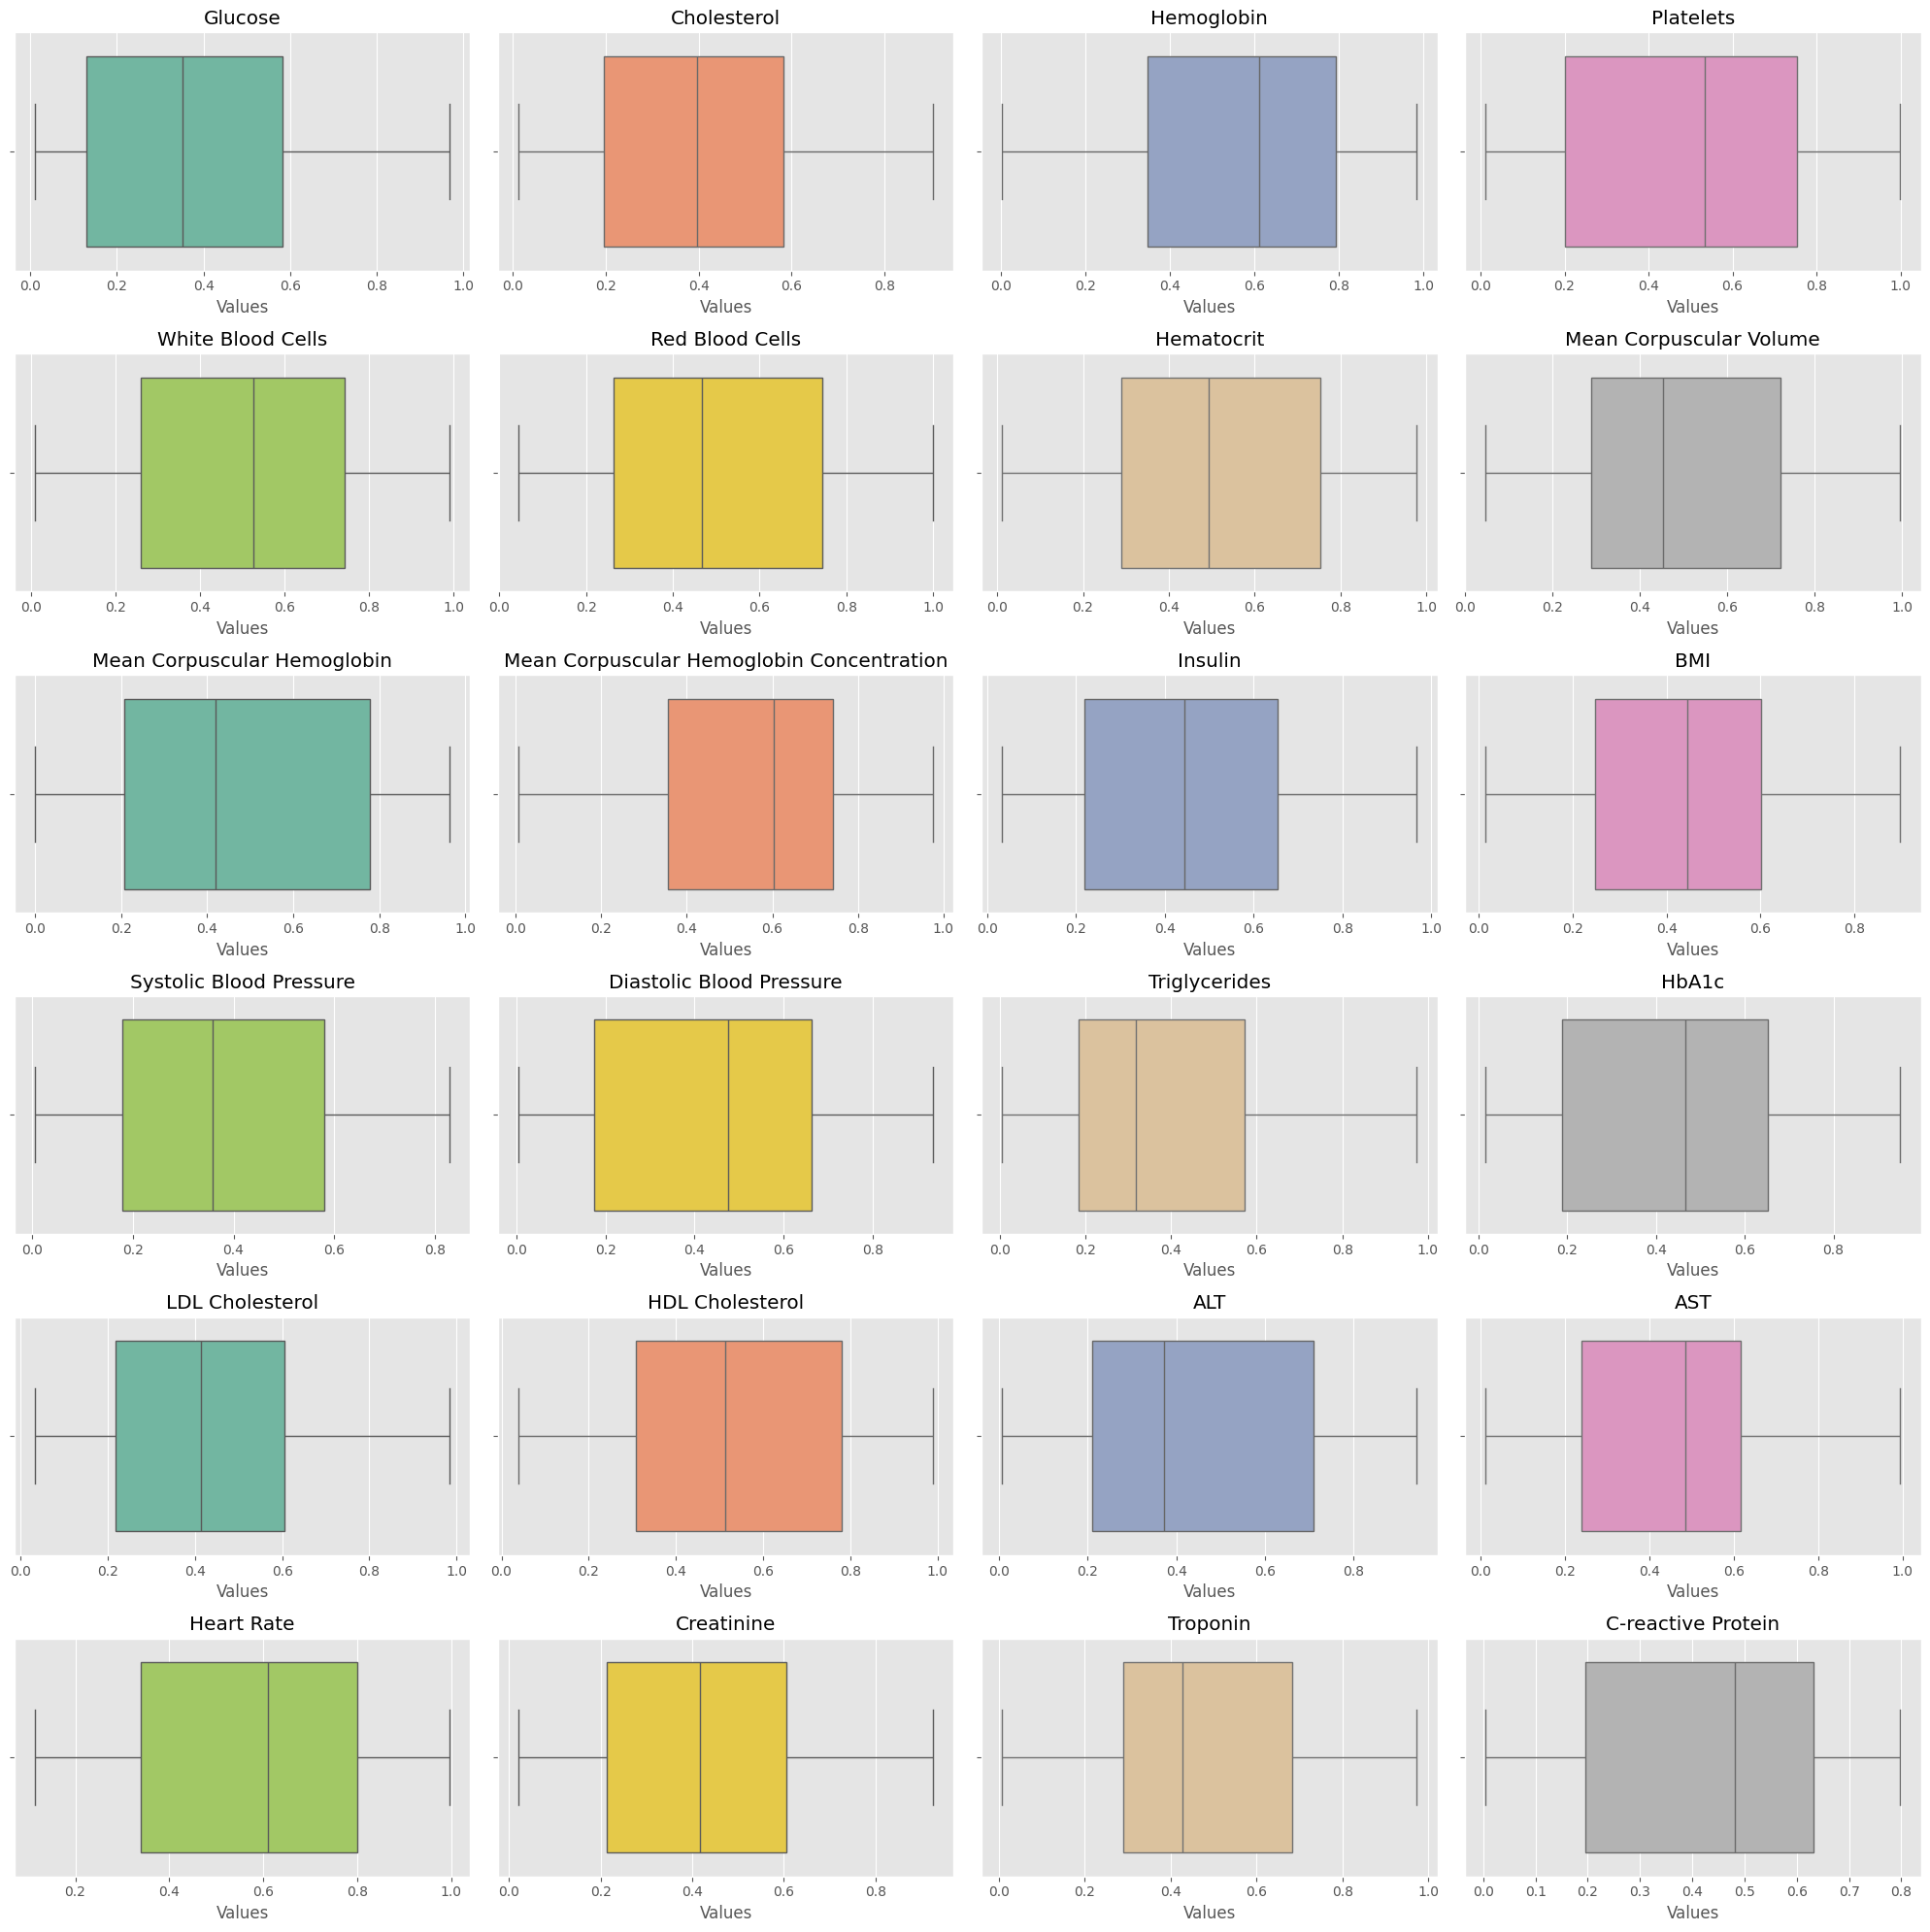

In [16]:
## Checking for Outliers
numeric_cols = [
    'Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets', 'White Blood Cells',
    'Red Blood Cells', 'Hematocrit', 'Mean Corpuscular Volume',
    'Mean Corpuscular Hemoglobin', 'Mean Corpuscular Hemoglobin Concentration',
    'Insulin', 'BMI', 'Systolic Blood Pressure', 'Diastolic Blood Pressure',
    'Triglycerides', 'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol',
    'ALT', 'AST', 'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein'
]

plt.figure(figsize=(20, 20))

# Define colors for better visualization
colors = sns.color_palette('Set2', len(numeric_cols))

for i, col in enumerate(numeric_cols):
    plt.subplot(6, 4, i+1)  # Adjusted to accommodate all columns
    sns.boxplot(x=ed_train[col], color=colors[i])
    plt.title(col)
    plt.xlabel('Values')
    plt.ylabel('')  # Removed y-axis label for clarity

plt.tight_layout()
plt.show()

- While Dealing with Outliers , from my Observations There is NO Outlier in the dataset.

<a id="1b"></a>
<h3 style="background-color:White;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Exploratory Data Analysis (EDA)</h3>

EDA aims to perform initial investigations on data before formal modeling and graphical representations and visualisations, in order to discover patterns, look over assumptions, and test hypothesis. The summarised information on main characteristics and hidden trends in data can help the doctor to identify concern areas and problems, and the resolution of these can boost their accuracy in diagosing diseases.

Taking a closer look at the target class labels, as well as their frequency of occurences:</h3>

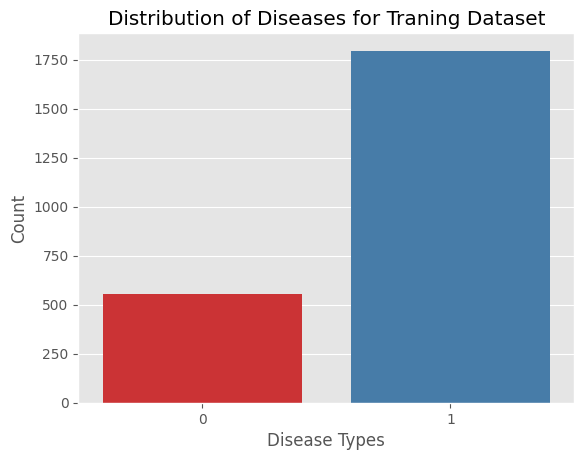

In [17]:
condition_ax = sns.countplot(x='target', data=ed_train, palette='Set1')
plt.title('Distribution of Diseases for Traning Dataset')
plt.xlabel('Disease Types')
plt.ylabel('Count')
plt.show()

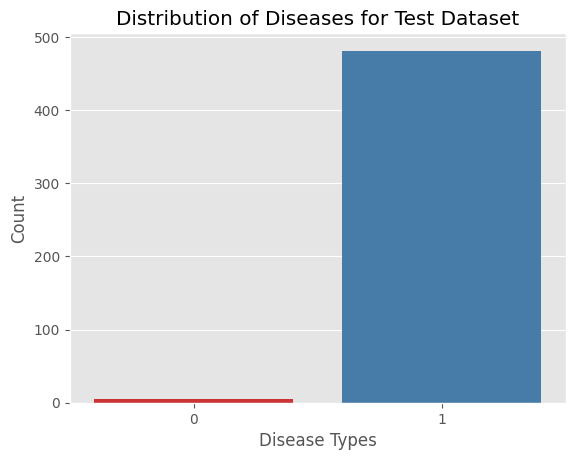

In [18]:
condition_ax = sns.countplot(x='target', data=ed_test, palette='Set1')
plt.title('Distribution of Diseases for Test Dataset')
plt.xlabel('Disease Types')
plt.ylabel('Count')
plt.show()

- The occurences of symptoms are mostly absent ie 0: Non Diseased compare to present ie 1: Diseased for both datasets.

In [19]:
# value count of Disease column
ed_train['target'].value_counts()

target
1    1795
0     556
Name: count, dtype: int64

In [20]:
# value count of Disease column
ed_test['target'].value_counts()

target
1    481
0      5
Name: count, dtype: int64

 **For analysis and comparison occurences of symptoms ie 0: Non Diseased compare to present ie 1: Diseased for target variable, it would be insightful to select symptoms that are commonly associated with the diseases listed:** 

1. Anemia:‘Hemoglobin’, ‘Red Blood Cells’, ‘Hematocrit’, ‘Mean Corpuscular Volume’, ‘Mean Corpuscular Hemoglobin’, and ‘Mean Corpuscular Hemoglobin Concentration’. These are directly related to anemia as it involves the quantity and quality of red blood cells and hemoglobin
2. Healthy:  ‘Healthy’ group to identify significant deviations in any of the listed symptoms.
3. Thalassemia ‘Hemoglobin’, ‘Red Blood Cells’, ‘Hematocrit’, ‘Mean Corpuscular Volume’, ‘Mean Corpuscular Hemoglobin’, and ‘Mean Corpuscular Hemoglobin Concentration’
4. Thrombocytopenia (Thromboc Angina): ‘Platelets’</h3>


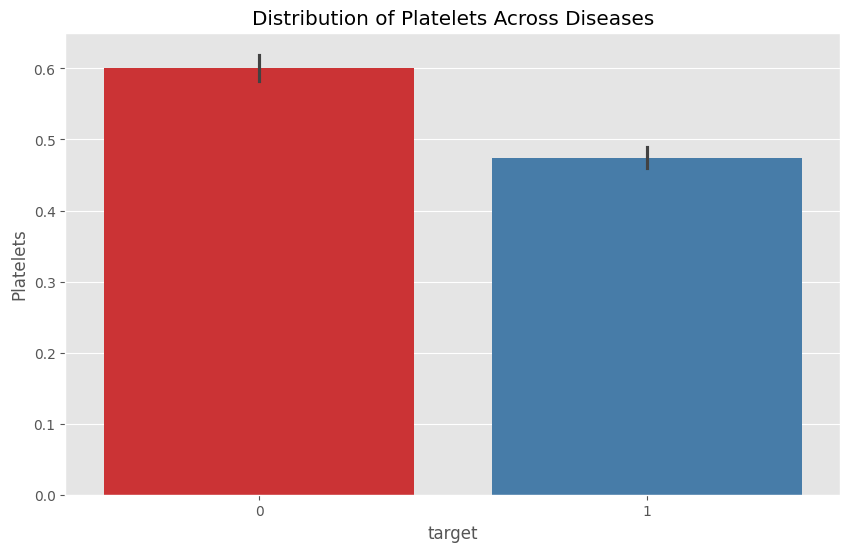

In [21]:
# Analysis for Platelet count in Thrombocytopenia
plt.figure(figsize=(10, 6))
sns.barplot(x='target', y='Platelets', data=ed_train, palette='Set1')
plt.title('Distribution of Platelets Across Diseases')
plt.ylabel('Platelets')
plt.xlabel('target')
plt.show()

- We can see that distribution of Platelet count in Thrombocytopenia symptoms for the target variable (i.e 1: Diseased and 0: Non-Diseased) is slightly higher for 0 than for the 1.

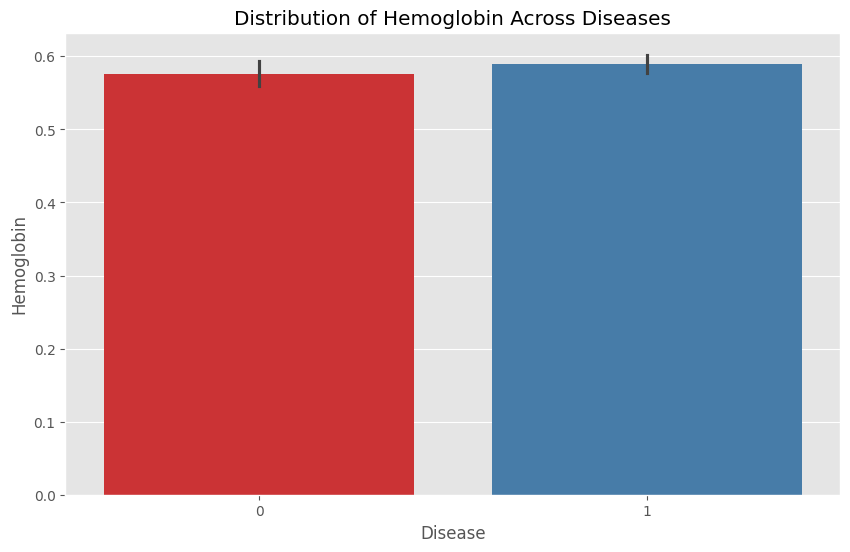

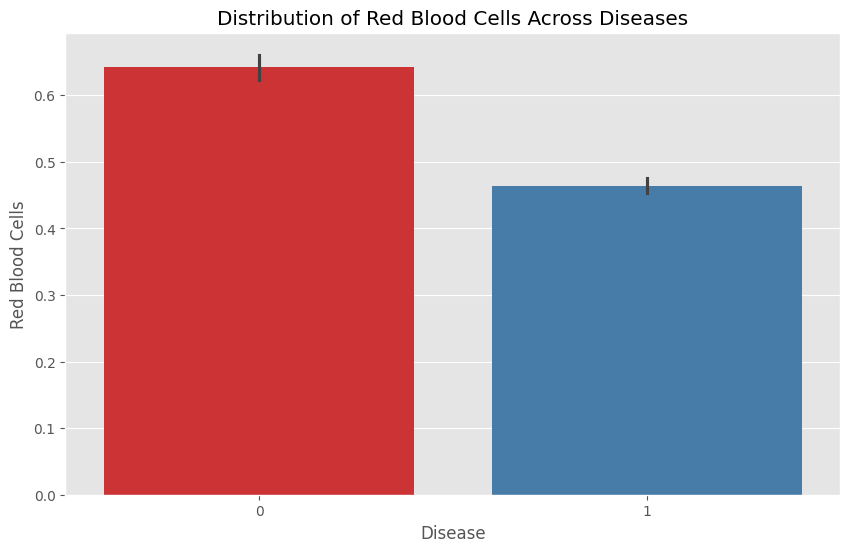

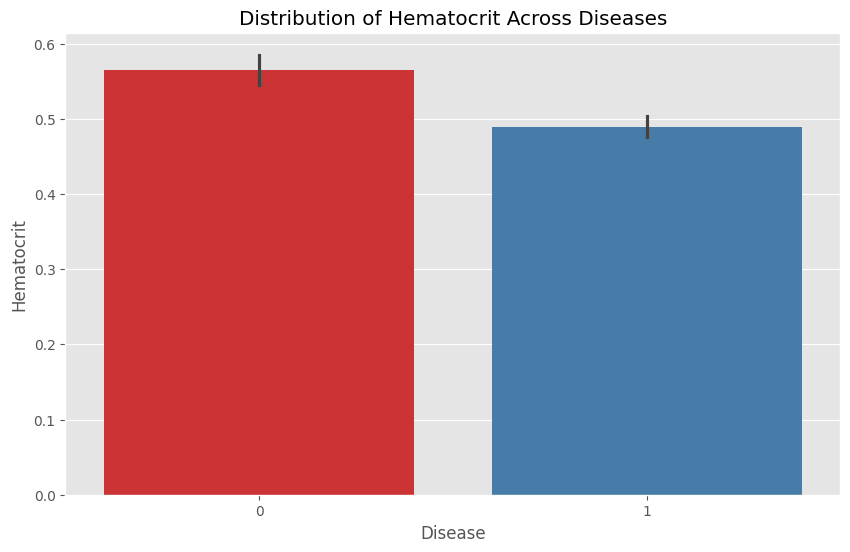

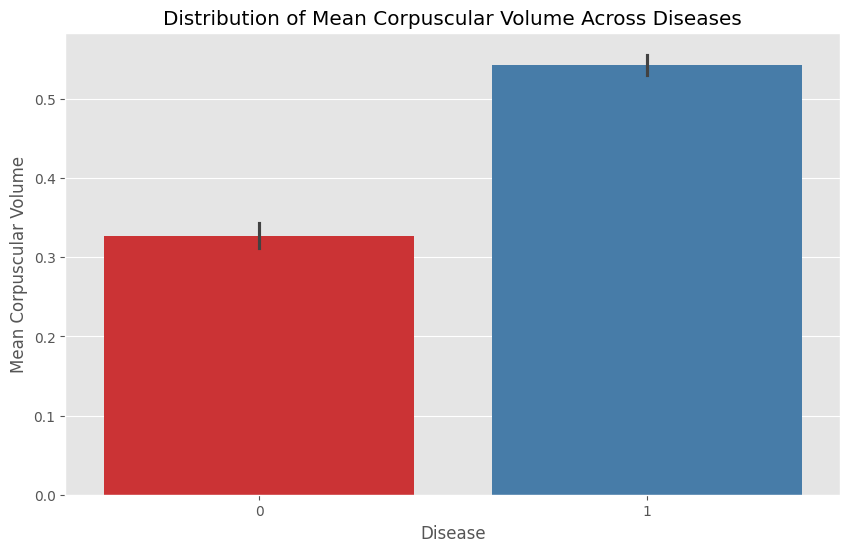

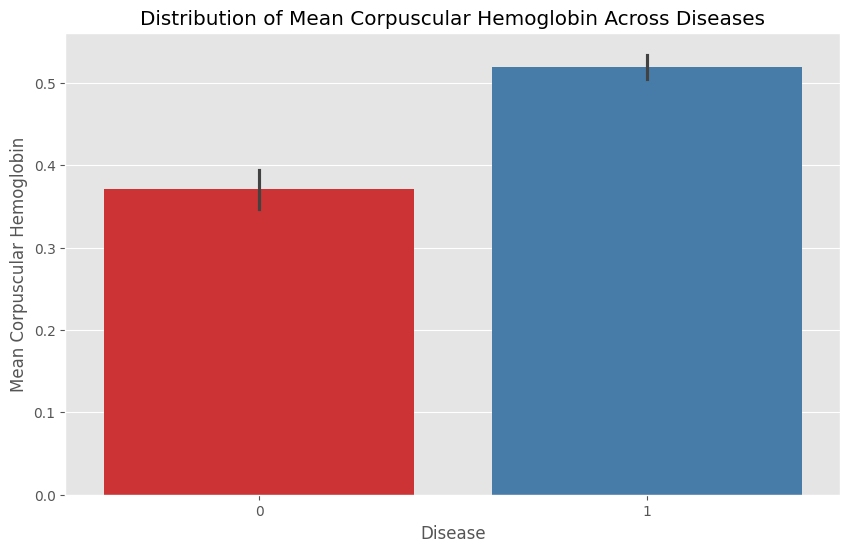

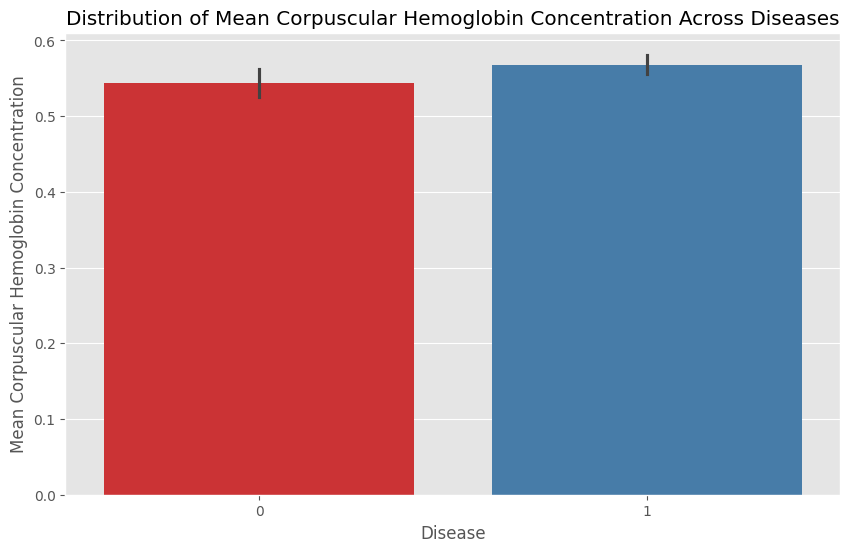

In [22]:
# Analysis for Anemia-related symptoms
anemia_related = ['Hemoglobin', 'Red Blood Cells', 'Hematocrit', 'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin', 'Mean Corpuscular Hemoglobin Concentration']
for symptom in anemia_related:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='target', y=symptom, data=ed_train, palette='Set1')
    plt.title(f'Distribution of {symptom} Across Diseases')
    plt.ylabel(symptom)
    plt.xlabel('Disease')
    plt.show()

- We can see that distribution of Anemia-related symptoms for the target variable (i.e 1: Diseased and 0: Non-Diseased) do differ some (like, Red Blood Cells, Mean Corpuscular Volume, Mean Corpuscular Hemoglobin) and relatively the same for some (Hemoglobin,Hematocrit, Mean Corpuscular Hemoglobin Concentration).

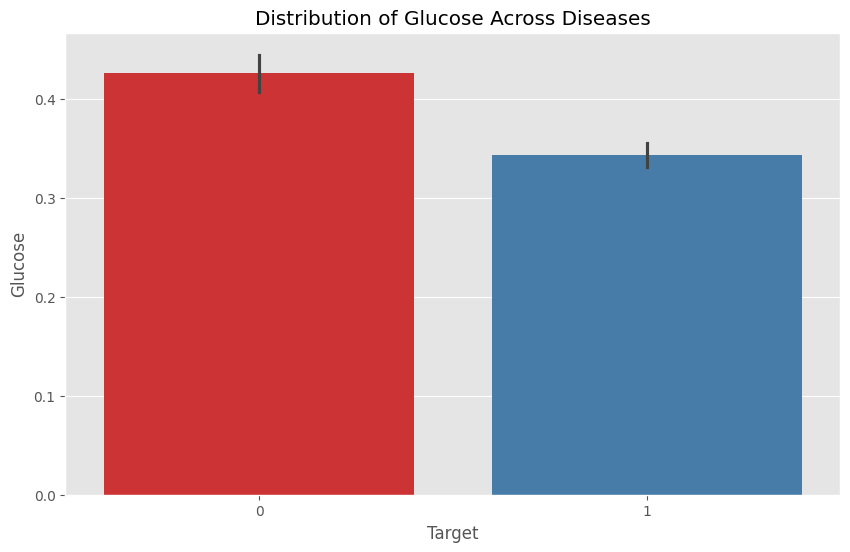

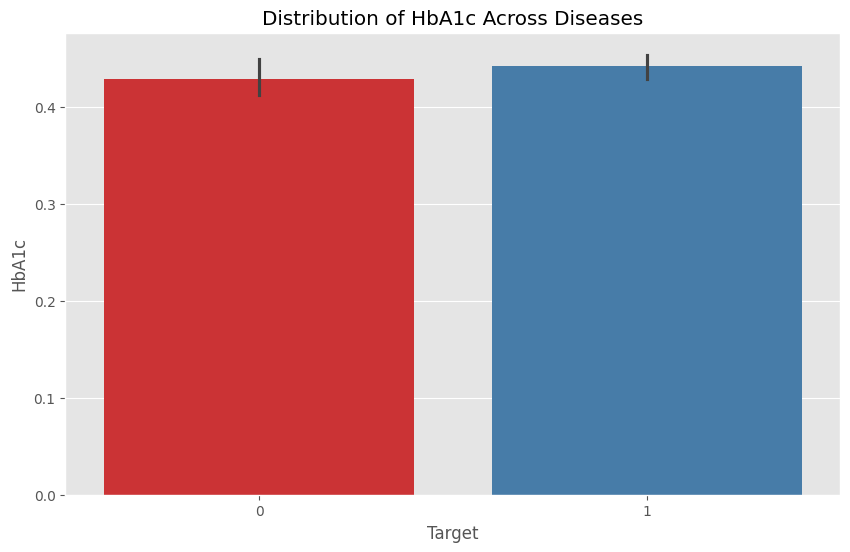

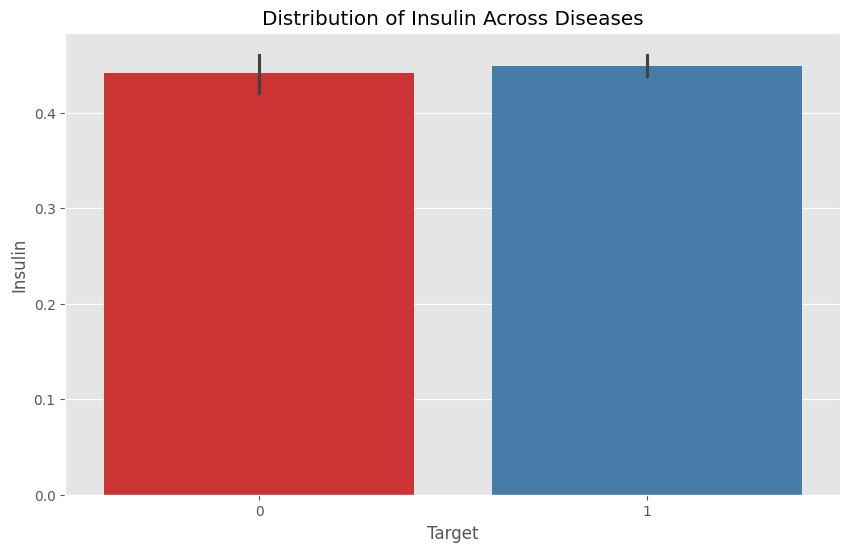

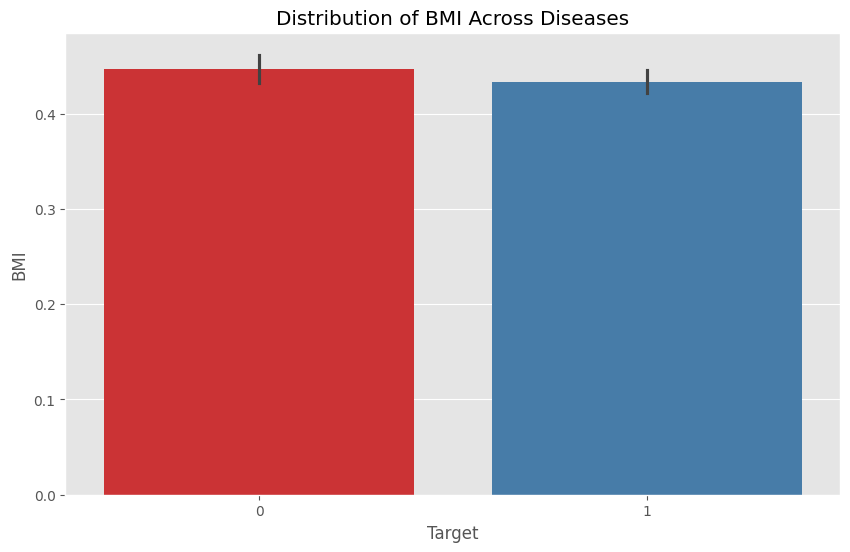

In [23]:
# Analysis for Diabetes-related symptoms
diabetes_related = ['Glucose', 'HbA1c', 'Insulin', 'BMI']
for symptom in diabetes_related:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='target', y=symptom, data=ed_train, palette='Set1')
    plt.title(f'Distribution of {symptom} Across Diseases')
    plt.ylabel(symptom)
    plt.xlabel('Target')
    plt.show()

- We can see that distribution of Diabetes-related symptoms are relatively the same for the target variable. The presence (1) and absence (0) of disease is relatively the same for Diabetes-related symptoms.

## **Heatmap**

For these quantitative binary attributes of symptoms, their linear relationships and their strengths can be compared using a correlation heatmap.

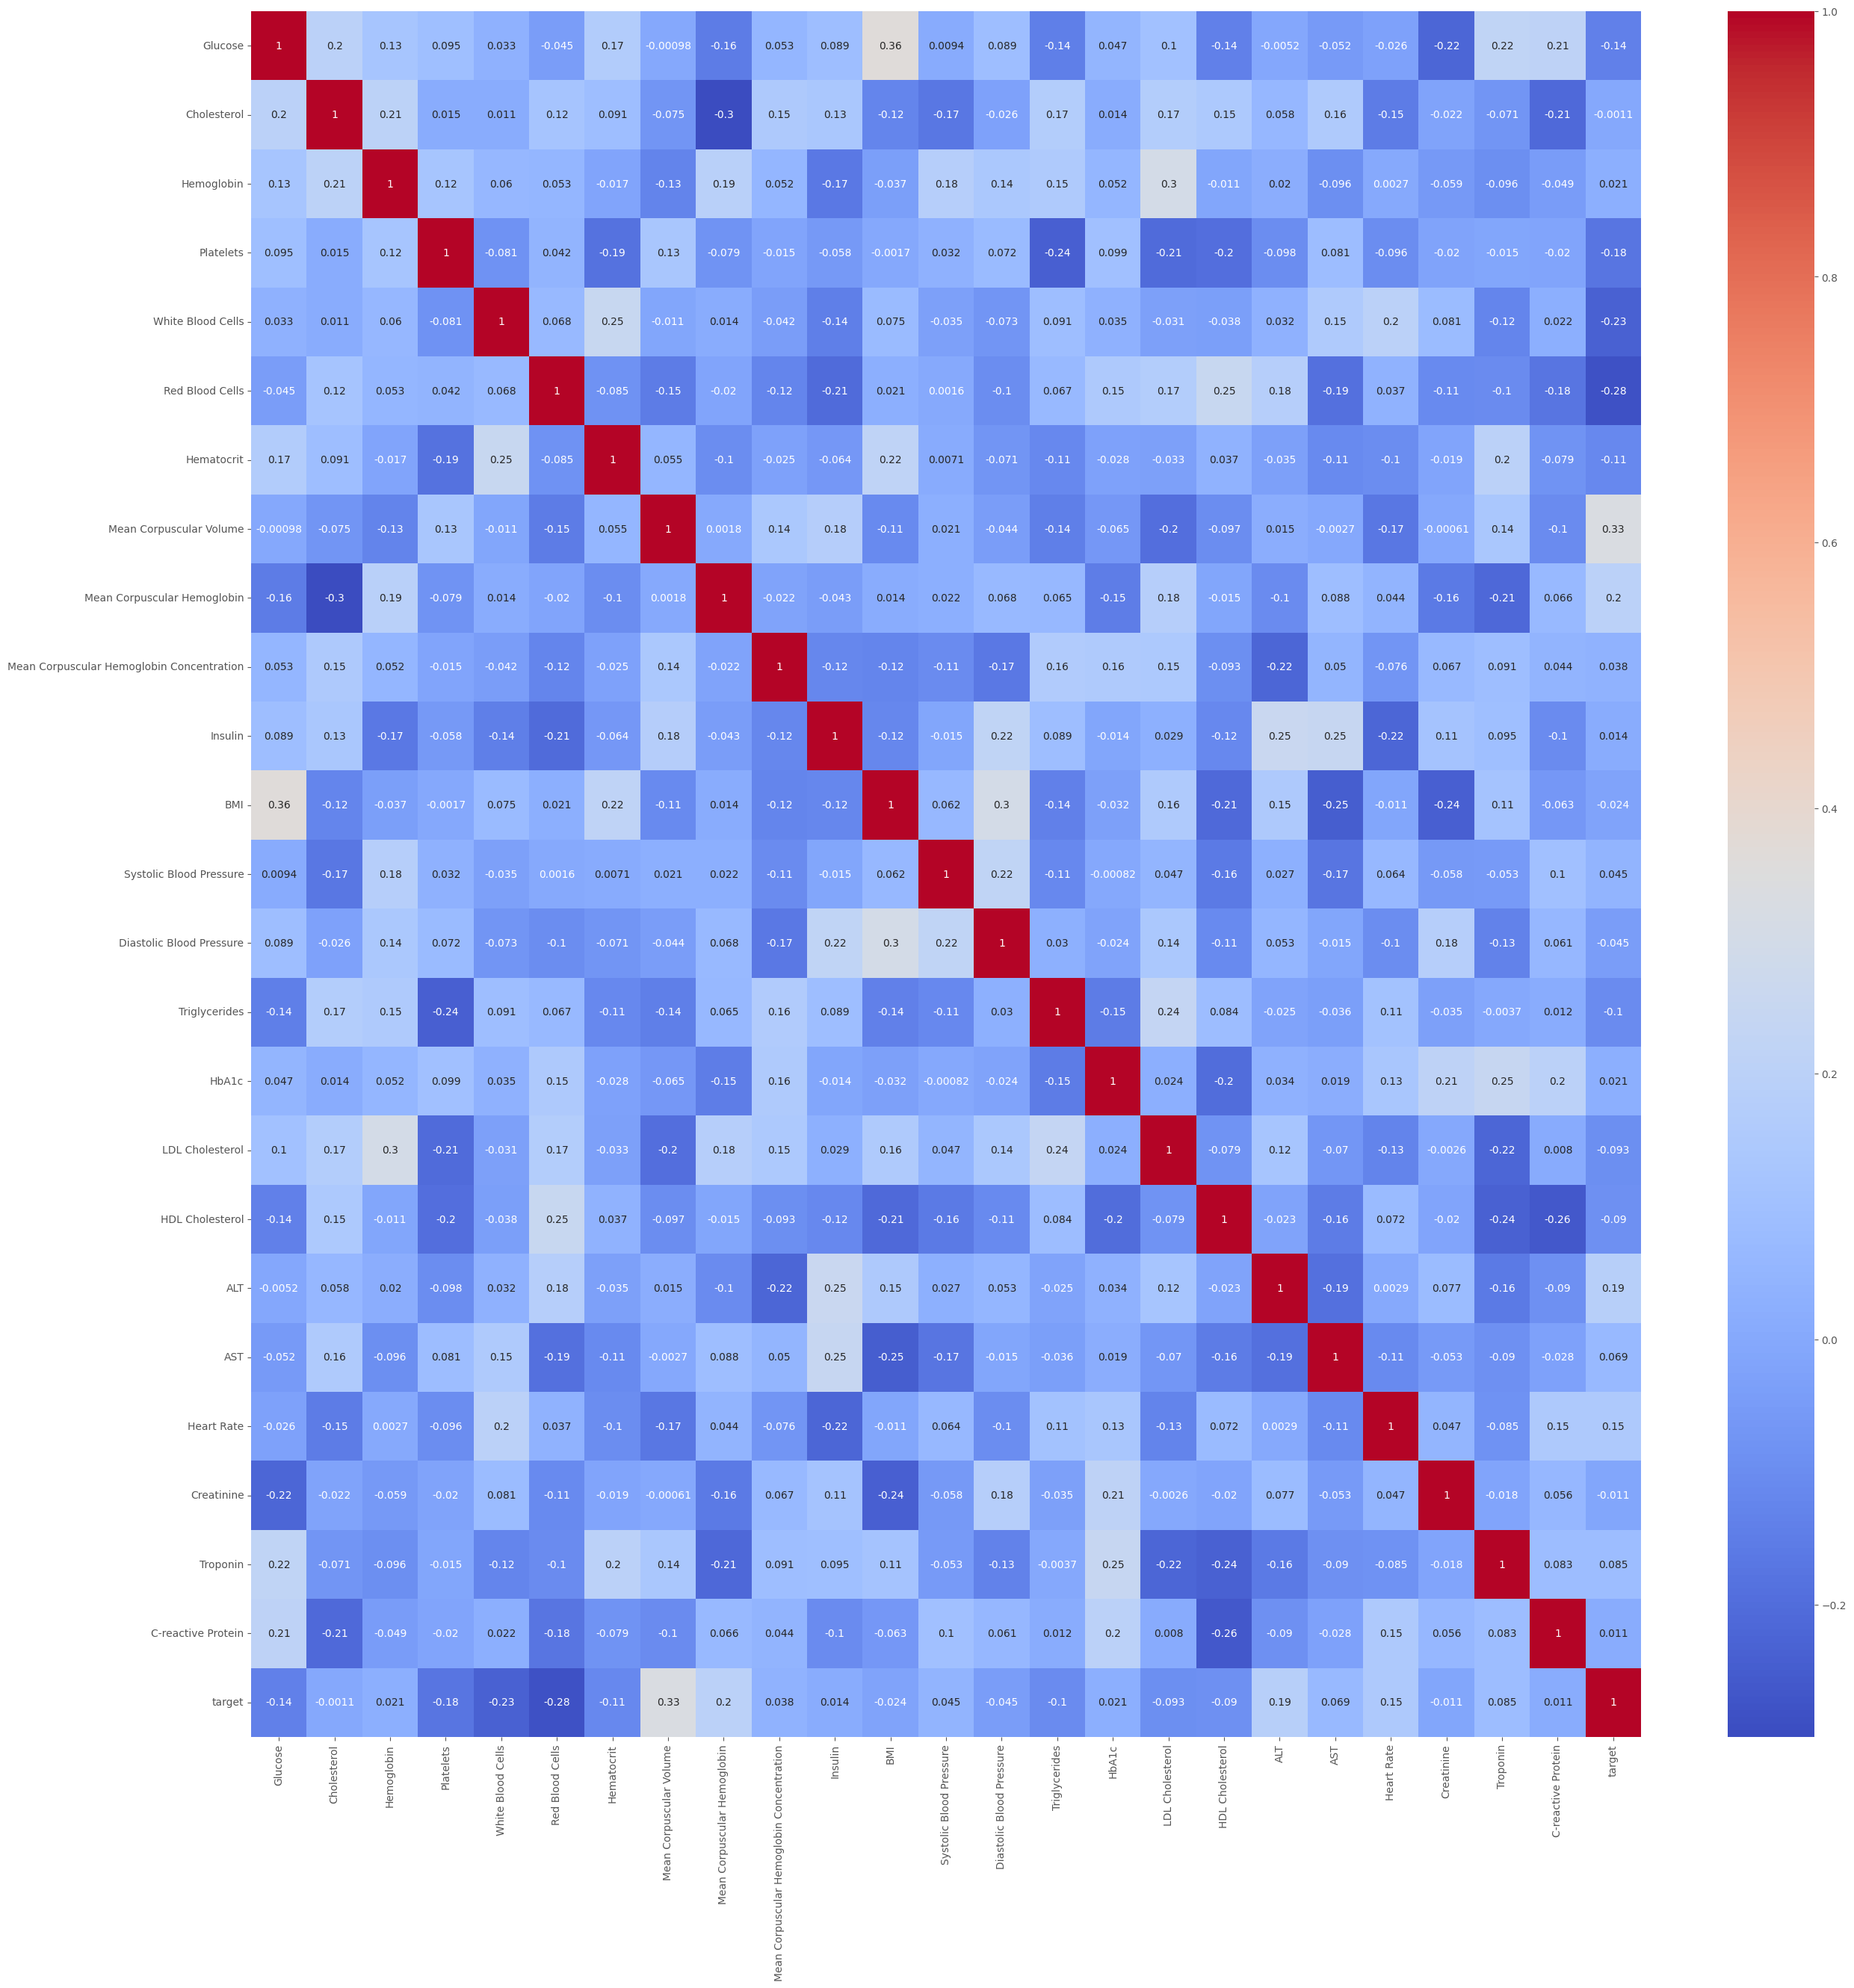

In [24]:
# compare linear relationships between attributes using correlation coefficient generated using correlation heatmap
plt.figure(figsize=(30,30))
correlation = ed_train.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

- Almost all symptoms have weak linear correlations, which is indicative that these symptoms do not come hand-in-hand. 

- Lastly, the summary statistics will be considered.

In [25]:
# summary statistics of the attributes, including measures of central tendency and measures of dispersion
ed_train.describe() 

Glucose  Cholesterol   Hemoglobin    Platelets  White Blood Cells  \
count  2351.000000  2351.000000  2351.000000  2351.000000        2351.000000   
mean      0.362828     0.393648     0.586190     0.504027           0.511086   
std       0.251889     0.239449     0.271498     0.303347           0.277270   
min       0.010994     0.012139     0.003021     0.012594           0.010139   
25%       0.129198     0.195818     0.346092     0.200865           0.259467   
50%       0.351722     0.397083     0.609836     0.533962           0.527381   
75%       0.582278     0.582178     0.791215     0.754841           0.743164   
max       0.968460     0.905026     0.983306     0.999393           0.990786   

       Red Blood Cells   Hematocrit  Mean Corpuscular Volume  \
count      2351.000000  2351.000000              2351.000000   
mean          0.506590     0.507152                 0.492200   
std           0.266565     0.285537                 0.275735   
min           0.044565     0.011772                 0.046942   
25%           0.263589     0.288132                 0.287532   
50%           0.467431     0.493428                 0.453052   
75%           0.743670     0.753657                 0.722293   
max           1.000000     0.977520                 0.995263   

       Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
count                  2351.000000                                2351.000000   
mean                      0.484459                                   0.562273   
std                       0.315618                                   0.273281   
min                       0.000554                                   0.006947   
25%                       0.207938                                   0.355774   
50%                       0.420723                                   0.603635   
75%                       0.778160                                   0.741381   
max                       0.963235                                   0.975586   

       ...        HbA1c  LDL Cholesterol  HDL Cholesterol          ALT  \
count  ...  2351.000000      2351.000000      2351.000000  2351.000000   
mean   ...     0.439112         0.421777         0.546079     0.434972   
std    ...     0.263779         0.252124         0.269511     0.267388   
min    ...     0.016256         0.033037         0.039505     0.007186   
25%    ...     0.188750         0.217757         0.307132     0.211078   
50%    ...     0.466375         0.413071         0.512941     0.373235   
75%    ...     0.652514         0.604753         0.779378     0.710319   
max    ...     0.950218         0.983826         0.989411     0.942549   

               AST   Heart Rate   Creatinine     Troponin  C-reactive Protein  \
count  2351.000000  2351.000000  2351.000000  2351.000000         2351.000000   
mean      0.452138     0.582255     0.425075     0.454597            0.430308   
std       0.242075     0.250915     0.229298     0.251189            0.243034   
min       0.013013     0.114550     0.021239     0.007490            0.004867   
25%       0.239659     0.339125     0.213026     0.288961            0.196192   
50%       0.486317     0.610860     0.417295     0.426863            0.481601   
75%       0.616181     0.800666     0.606719     0.682164            0.631426   
max       0.994460     0.996873     0.925924     0.972803            0.797906   

            target  
count  2351.000000  
mean      0.763505  
std       0.425020  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  

[8 rows x 25 columns]

In [26]:
# summary statistics of the attributes, including measures of central tendency and measures of dispersion
ed_train.describe() 

Glucose  Cholesterol   Hemoglobin    Platelets  White Blood Cells  \
count  2351.000000  2351.000000  2351.000000  2351.000000        2351.000000   
mean      0.362828     0.393648     0.586190     0.504027           0.511086   
std       0.251889     0.239449     0.271498     0.303347           0.277270   
min       0.010994     0.012139     0.003021     0.012594           0.010139   
25%       0.129198     0.195818     0.346092     0.200865           0.259467   
50%       0.351722     0.397083     0.609836     0.533962           0.527381   
75%       0.582278     0.582178     0.791215     0.754841           0.743164   
max       0.968460     0.905026     0.983306     0.999393           0.990786   

       Red Blood Cells   Hematocrit  Mean Corpuscular Volume  \
count      2351.000000  2351.000000              2351.000000   
mean          0.506590     0.507152                 0.492200   
std           0.266565     0.285537                 0.275735   
min           0.044565     0.011772                 0.046942   
25%           0.263589     0.288132                 0.287532   
50%           0.467431     0.493428                 0.453052   
75%           0.743670     0.753657                 0.722293   
max           1.000000     0.977520                 0.995263   

       Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
count                  2351.000000                                2351.000000   
mean                      0.484459                                   0.562273   
std                       0.315618                                   0.273281   
min                       0.000554                                   0.006947   
25%                       0.207938                                   0.355774   
50%                       0.420723                                   0.603635   
75%                       0.778160                                   0.741381   
max                       0.963235                                   0.975586   

       ...        HbA1c  LDL Cholesterol  HDL Cholesterol          ALT  \
count  ...  2351.000000      2351.000000      2351.000000  2351.000000   
mean   ...     0.439112         0.421777         0.546079     0.434972   
std    ...     0.263779         0.252124         0.269511     0.267388   
min    ...     0.016256         0.033037         0.039505     0.007186   
25%    ...     0.188750         0.217757         0.307132     0.211078   
50%    ...     0.466375         0.413071         0.512941     0.373235   
75%    ...     0.652514         0.604753         0.779378     0.710319   
max    ...     0.950218         0.983826         0.989411     0.942549   

               AST   Heart Rate   Creatinine     Troponin  C-reactive Protein  \
count  2351.000000  2351.000000  2351.000000  2351.000000         2351.000000   
mean      0.452138     0.582255     0.425075     0.454597            0.430308   
std       0.242075     0.250915     0.229298     0.251189            0.243034   
min       0.013013     0.114550     0.021239     0.007490            0.004867   
25%       0.239659     0.339125     0.213026     0.288961            0.196192   
50%       0.486317     0.610860     0.417295     0.426863            0.481601   
75%       0.616181     0.800666     0.606719     0.682164            0.631426   
max       0.994460     0.996873     0.925924     0.972803            0.797906   

            target  
count  2351.000000  
mean      0.763505  
std       0.425020  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  

[8 rows x 25 columns]

- In summary, the datasets contain records for 25 predictors or independent or explanatory attributes, and an attribute for class label. The predictors all have no missing data values.

-
describe() is used to obtain summary statistics including measures of central tendency such as mean and median, and measures of dispersion such as standard deviation, which are useful in providing a quick and simple description of the dataset and its characteristics. 

## **Machine Learning**

<a id="5b"></a>
<h3 style="background-color:White;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Machine Learning</h3>


The two datasets represent the split into two separate sets: the training set and test set. They both consist of the same attributes, but not   the same attribute values. The training set is used to train and construct the classification models. The test set is used to predict the classifications of the new unbiased data that were not used to train the model, before evaluating the model performance based on the performance metrics of accuracy, precision, recall, and F1-score of those classifications. 

The Target Column 'Diseasese' which is the predicted attribute. We will use this column to predict the disease. 
The unique values in this column: Anemia, Healthy, Diabetes, Thalasse, Thromboc.

The following machine Learning algorithms are chosen to fit to the dataset. These models should be classifiers for multi-class classification. 

1. Decision Tree (DT)
2. Random Forest (RF)
3. XGB Classifier
4. Multilayer Perceptron (MLP)</h3>


## **Process**

- Renaming Columns
- In some column we have space which i think will create problem later on so we also remove those spaces. So will remove the speaces.
- In target Column for traning dataset, i did some changes, because there are 5 different cate: Anemia, Healthy, Diabetes, Thalasse, Thromboc.
- In target Column for testing dataset, i did some changes, because there are 6 different cate: Diabetes, Anemia, Thalasse, Heart Di, Thromboc, Healthy.
- And will change these five and six levels to a binary indicator (1: Diseased, 0: Non-diseased).

In [27]:
# make a copy of the data 
df_train = ed_train.copy()
df_train.head()

Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.739597     0.650198    0.713631   0.868491           0.687433   
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.529895    0.290006                 0.631045   
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.001328                                   0.795829   
1                     0.207938                                   0.505562   
2                     0.868369                                   0.026808   
3                     0.125447                                   0.501051   
4                     0.257288                                   0.805987   

   ...     HbA1c  LDL Cholesterol  HDL Cholesterol       ALT       AST  \
0  ...  0.502665         0.215560         0.512941  0.064187  0.610827   
1  ...  0.856810         0.652465         0.106961  0.942549  0.344261   
2  ...  0.466795         0.387332         0.421763  0.007186  0.506918   
3  ...  0.016256         0.040137         0.826721  0.265415  0.594148   
4  ...  0.429431         0.146294         0.221574  0.015280  0.567115   

   Heart Rate  Creatinine  Troponin  C-reactive Protein  target  
0    0.939485    0.095512  0.465957            0.769230       0  
1    0.666368    0.659060  0.816982            0.401166       1  
2    0.431704    0.417295  0.799074            0.779208       1  
3    0.225756    0.490349  0.637061            0.354094       1  
4    0.841412    0.153350  0.794008            0.094970       1  

[5 rows x 25 columns]

In [28]:
# make a copy of the data 
df_test = ed_test.copy()
df_test.head()

Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.001827     0.033693    0.114755   0.997927           0.562604   
1  0.436679     0.972653    0.084998   0.180909           0.675736   
2  0.545697     0.324815    0.584467   0.475748           0.558596   
3  0.172994     0.050351    0.736000   0.782022           0.069435   
4  0.758534     0.739968    0.597868   0.772683           0.875720   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.866499    0.578042                 0.914615   
1         0.563889    0.798382                 0.670361   
2         0.661007    0.934056                 0.381782   
3         0.085219    0.032907                 0.460619   
4         0.860265    0.486189                 0.486686   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.026864                                   0.038641   
1                     0.376092                                   0.184890   
2                     0.500342                                   0.531829   
3                     0.785448                                   0.491495   
4                     0.621048                                   0.191756   

   ...     HbA1c  LDL Cholesterol  HDL Cholesterol       ALT       AST  \
0  ...  0.653230         0.186104         0.430398  0.016678  0.885352   
1  ...  0.833540         0.153001         0.458533  0.401845  0.635969   
2  ...  0.678901         0.220479         0.817151  0.690981  0.101633   
3  ...  0.381500         0.459396         0.420154  0.798537  0.399236   
4  ...  0.993381         0.272338         0.663579  0.265227  0.918847   

   Heart Rate  Creatinine  Troponin  C-reactive Protein  target  
0    0.652733    0.788235  0.054788            0.031313       1  
1    0.574425    0.047025  0.607985            0.594123       1  
2    0.855740    0.551124  0.413294            0.070909       1  
3    0.324600    0.499504  0.436662            0.242766       1  
4    0.804910    0.571119  0.188368            0.750848       1  

[5 rows x 25 columns]

In [29]:
# In some of the features, there is space will and it will create problem later on. 
# So we rename those attributes to handle problems in the future.
df_train.rename(columns={
    'White Blood Cells': 'White_Blood_Cells',
    'Red Blood Cells': 'Red_Blood_Cells',
    'Mean Corpuscular Volume': 'MC_Volume',
    'Mean Corpuscular Hemoglobin': 'MC_Hemoglobin',
    'Mean Corpuscular Hemoglobin Concentration': 'MC_Hemoglobin_Concentration',
    'Systolic Blood Pressure': 'Systolic_Blood_Pressure',
    'Diastolic Blood Pressure': 'Diastolic_Blood_Pressure',
    'HDL Cholesterol': 'HDL_Cholesterol',
    'LDL Cholesterol': 'LDL_Cholesterol',
    'Heart Rate': 'Heart_Rate',
    'C-reactive Protein': 'C-reactive_Protein'
}, inplace=True)

df_test.rename(columns={
    'White Blood Cells': 'White_Blood_Cells',
    'Red Blood Cells': 'Red_Blood_Cells',
    'Mean Corpuscular Volume': 'MC_Volume',
    'Mean Corpuscular Hemoglobin': 'MC_Hemoglobin',
    'Mean Corpuscular Hemoglobin Concentration': 'MC_Hemoglobin_Concentration',
    'Systolic Blood Pressure': 'Systolic_Blood_Pressure',
    'Diastolic Blood Pressure': 'Diastolic_Blood_Pressure',
    'HDL Cholesterol': 'HDL_Cholesterol',
    'LDL Cholesterol': 'LDL_Cholesterol',
    'Heart Rate': 'Heart_Rate',
    'C-reactive Protein': 'C-reactive_Protein'
}, inplace=True)

In [30]:
# Check the result
df_train.head()

Glucose  Cholesterol  Hemoglobin  Platelets  White_Blood_Cells  \
0  0.739597     0.650198    0.713631   0.868491           0.687433   
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   

   Red_Blood_Cells  Hematocrit  MC_Volume  MC_Hemoglobin  \
0         0.529895    0.290006   0.631045       0.001328   
1         0.403033    0.164216   0.307553       0.207938   
2         0.382021    0.625267   0.295122       0.868369   
3         0.166214    0.073293   0.668719       0.125447   
4         0.439851    0.894991   0.442159       0.257288   

   MC_Hemoglobin_Concentration  ...     HbA1c  LDL_Cholesterol  \
0                     0.795829  ...  0.502665         0.215560   
1                     0.505562  ...  0.856810         0.652465   
2                     0.026808  ...  0.466795         0.387332   
3                     0.501051  ...  0.016256         0.040137   
4                     0.805987  ...  0.429431         0.146294   

   HDL_Cholesterol       ALT       AST  Heart_Rate  Creatinine  Troponin  \
0         0.512941  0.064187  0.610827    0.939485    0.095512  0.465957   
1         0.106961  0.942549  0.344261    0.666368    0.659060  0.816982   
2         0.421763  0.007186  0.506918    0.431704    0.417295  0.799074   
3         0.826721  0.265415  0.594148    0.225756    0.490349  0.637061   
4         0.221574  0.015280  0.567115    0.841412    0.153350  0.794008   

   C-reactive_Protein  target  
0            0.769230       0  
1            0.401166       1  
2            0.779208       1  
3            0.354094       1  
4            0.094970       1  

[5 rows x 25 columns]

In [31]:
# Check the result
df_test.head()

Glucose  Cholesterol  Hemoglobin  Platelets  White_Blood_Cells  \
0  0.001827     0.033693    0.114755   0.997927           0.562604   
1  0.436679     0.972653    0.084998   0.180909           0.675736   
2  0.545697     0.324815    0.584467   0.475748           0.558596   
3  0.172994     0.050351    0.736000   0.782022           0.069435   
4  0.758534     0.739968    0.597868   0.772683           0.875720   

   Red_Blood_Cells  Hematocrit  MC_Volume  MC_Hemoglobin  \
0         0.866499    0.578042   0.914615       0.026864   
1         0.563889    0.798382   0.670361       0.376092   
2         0.661007    0.934056   0.381782       0.500342   
3         0.085219    0.032907   0.460619       0.785448   
4         0.860265    0.486189   0.486686       0.621048   

   MC_Hemoglobin_Concentration  ...     HbA1c  LDL_Cholesterol  \
0                     0.038641  ...  0.653230         0.186104   
1                     0.184890  ...  0.833540         0.153001   
2                     0.531829  ...  0.678901         0.220479   
3                     0.491495  ...  0.381500         0.459396   
4                     0.191756  ...  0.993381         0.272338   

   HDL_Cholesterol       ALT       AST  Heart_Rate  Creatinine  Troponin  \
0         0.430398  0.016678  0.885352    0.652733    0.788235  0.054788   
1         0.458533  0.401845  0.635969    0.574425    0.047025  0.607985   
2         0.817151  0.690981  0.101633    0.855740    0.551124  0.413294   
3         0.420154  0.798537  0.399236    0.324600    0.499504  0.436662   
4         0.663579  0.265227  0.918847    0.804910    0.571119  0.188368   

   C-reactive_Protein  target  
0            0.031313       1  
1            0.594123       1  
2            0.070909       1  
3            0.242766       1  
4            0.750848       1  

[5 rows x 25 columns]

In [32]:
df_test.shape, df_train.shape

((486, 25), (2351, 25))

In [33]:
# split dataset into attributes and labels
X_train = df_train.iloc[:, :-1].values # the training attributes
y_train = df_train.iloc[:, 24].values # the training labels
X_test = df_test.iloc[:, :-1].values # the testing attributes
y_test = df_test.iloc[:, 24].values # the testing labels

In [34]:
random_state = check_random_state(42)

<a id="5b"></a>
<h3 style="background-color:White;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Decision Tree</h3>


Decision Tree (DT) is a popular supervised learning algorithm used for classification and regression tasks. It recursively splits the dataset into subsets based on the most significant attribute, forming a tree-like structure of decisions.

1. Easy to Understand and Interpret
2. Handles Nonlinear Relationships
3. Prone to Overfitting

Decision Tree's intuitive nature makes it easy to interpret, making it a preferred choice for applications where model transparency is essential. It can effectively capture nonlinear relationships in the data, offering flexibility in modeling complex scenarios. However, decision trees are susceptible to overfitting, necessitating techniques like pruning to improve generalization and performance on unseen data.</h3>


In [35]:
# using DT based on information gain
classifierDT = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=2)
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

<a id="5b"></a>
<h3 style="background-color:White;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Random Forest</h3>


Random Forest is an ensemble learning technique used for both classification and regression tasks. It builds multiple decision trees during training and merges their predictions to improve accuracy and reduce overfitting.

1. High Accuracy
2. Robust to Overfitting
3. Handles Missing Values

Random Forest is a versatile and powerful algorithm, especially effective in scenarios with high-dimensional data and complex relationships. It excels in situations where high accuracy is crucial, and its ability to handle missing values and resist overfitting makes it a popular choice in machine learning applications.</h3>


In [36]:
# using RF classifier
classifierRF = RandomForestClassifier(criterion='entropy', min_samples_leaf=2)
classifierRF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2)

<a id="5b"></a>
<h3 style="background-color:White;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">XGB Classifier</h3>


XGB Classifier is a powerful supervised learning algorithm used for classification tasks. It is an implementation of the gradient boosting framework, which builds an ensemble of decision trees to improve predictive performance.

1. High Predictive Accuracy
2. Handles Nonlinear Relationships
3. Computationally Intensive

XGB Classifier's high predictive accuracy makes it a preferred choice for many competitive machine learning tasks. It effectively captures nonlinear relationships in the data, providing robust modelling capabilities for complex scenarios. However, it is computationally intensive and requires careful parameter tuning to achieve optimal performance, often necessitating techniques like cross-validation and regularization to prevent overfitting and enhance generalization on unseen data.</h3>


In [37]:
# Using XGBoost
classifierXGB = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)
classifierXGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)

<a id="5b"></a>
<h3 style="background-color:White;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Multilayer Perceptron (MLP)</h3>


Multilayer Perceptron (MLP) is a popular supervised learning algorithm used for classification and regression tasks. It consists of multiple layers of interconnected neurons, enabling it to learn complex patterns through backpropagation.

1. Capable of Learning Complex Patterns
2. Handles Nonlinear Relationships
3. Computationally Intensive

MLP's ability to learn complex patterns makes it a powerful tool for tasks requiring high predictive accuracy. Its multilayer structure allows it to capture nonlinear relationships in the data, providing robustness in modelling intricate scenarios. However, MLPs are computationally intensive and require substantial training time, often necessitating techniques like regularization and early stopping to prevent overfitting and improve generalization on unseen data.</h3>


In [38]:
from sklearn.neural_network import MLPClassifier
# using MLP classifier
classifierMLP = MLPClassifier()
classifierMLP.fit(X_train, y_train)

MLPClassifier()

<a id="6"></a>
<h3 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Model Evaluation</h3>

<h3 style="color:Black;font-family:newtimeroman;font-size:100%;">

<div style="border-radius:10px; padding: 15px; background-color: White; font-size:120%; text-align:left">

The model performance is evaluated and validated by using the test set of 42 records to predict the classifications of these new unbiased data that were not used to train the model. 

The confusion matrix is then used to determine the performance metrics of accuracy, precision, recall, and F1-score, based on those classifications. 

The supports are 1 instance for each target class label of disease. 

This process ensures that the models are useful by being generalisable even when the specific training data used is extended to include new test data, or in technical terms ‘avoid over fitting’.
</h3>
</div>


In [39]:
# use the chosen four models to make predictions on test data
y_predDT = classifierDT.predict(X_test)
y_predRF = classifierRF.predict(X_test)
y_predXGB = classifierXGB.predict(X_test)
y_predMLP = classifierMLP.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# for DT model
print("Decision Trees:")
DT_accuracy = accuracy_score(y_test, y_predDT)
DT_precision = precision_score(y_test, y_predDT)
DT_recall = recall_score(y_test, y_predDT)
DT_f1 = f1_score(y_test, y_predDT)

print("\nAccuracy:", DT_accuracy)
print("\nPrecision:", DT_precision)
print("\nRecall:", DT_recall)
print("\nF1-score:", DT_f1)

# using confusion matrix
print(classification_report(y_test, y_predDT))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierDT.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predDT))

Decision Trees:

Accuracy: 0.8374485596707819

Precision: 1.0

Recall: 0.8357588357588358

F1-score: 0.9105322763306909
              precision    recall  f1-score   support

           0       0.06      1.00      0.11         5
           1       1.00      0.84      0.91       481

    accuracy                           0.84       486
   macro avg       0.53      0.92      0.51       486
weighted avg       0.99      0.84      0.90       486

Train Accuracy:  1.0
Test Accuracy:  0.8374485596707819


- Creating a new dataframe for collecting the metric values to compare the models :

In [41]:
comparision = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

In [42]:
comparision.loc[0] = ['DT', DT_accuracy, DT_precision, DT_recall, DT_f1,]

In [43]:
comparision

Model  Accuracy  Precision    Recall  F1-score
0    DT  0.837449        1.0  0.835759  0.910532

In [44]:
# for RF model
print("Ramdon Forest:")
RF_accuracy = accuracy_score(y_test, y_predRF)
RF_precision = precision_score(y_test, y_predRF)
RF_recall = recall_score(y_test, y_predRF)
RF_f1 = f1_score(y_test, y_predRF)

print("\nAccuracy:", RF_accuracy)
print("\nPrecision:", RF_precision)
print("\nRecall:", RF_recall)
print("\nF1-score:", RF_f1)

# using confusion matrix
print(classification_report(y_test, y_predRF))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierRF.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predRF))

Ramdon Forest:

Accuracy: 0.9218106995884774

Precision: 0.9955257270693513

Recall: 0.9251559251559252

F1-score: 0.959051724137931
              precision    recall  f1-score   support

           0       0.08      0.60      0.14         5
           1       1.00      0.93      0.96       481

    accuracy                           0.92       486
   macro avg       0.54      0.76      0.55       486
weighted avg       0.99      0.92      0.95       486

Train Accuracy:  1.0
Test Accuracy:  0.9218106995884774


In [45]:
comparision.loc[1] = ['RF', RF_accuracy, RF_precision, RF_recall, RF_f1]
comparision

Model  Accuracy  Precision    Recall  F1-score
0    DT  0.837449   1.000000  0.835759  0.910532
1    RF  0.921811   0.995526  0.925156  0.959052

In [46]:
# for XGB model
print("XGB Classifier:")
XGB_accuracy = accuracy_score(y_test, y_predXGB)
XGB_precision = precision_score(y_test, y_predXGB)
XGB_recall = recall_score(y_test, y_predXGB)
XGB_f1 = f1_score(y_test, y_predXGB)

print("\nAccuracy:", XGB_accuracy)
print("\nPrecision:", XGB_precision)
print("\nRecall:", XGB_recall)
print("\nF1-score:", XGB_f1)

# using confusion matrix
print(classification_report(y_test, y_predXGB))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierXGB.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predXGB))

XGB Classifier:

Accuracy: 0.8621399176954733

Precision: 0.9975961538461539

Recall: 0.8627858627858628

F1-score: 0.9253065774804905
              precision    recall  f1-score   support

           0       0.06      0.80      0.11         5
           1       1.00      0.86      0.93       481

    accuracy                           0.86       486
   macro avg       0.53      0.83      0.52       486
weighted avg       0.99      0.86      0.92       486

Train Accuracy:  1.0
Test Accuracy:  0.8621399176954733


In [47]:
comparision.loc[2] = ['XGB', XGB_accuracy, XGB_precision, XGB_recall, XGB_f1]
comparision

Model  Accuracy  Precision    Recall  F1-score
0    DT  0.837449   1.000000  0.835759  0.910532
1    RF  0.921811   0.995526  0.925156  0.959052
2   XGB  0.862140   0.997596  0.862786  0.925307

In [48]:
# for MLP model
print("Multilayer Perceptron (MLP):")
MLP_accuracy = accuracy_score(y_test, y_predMLP)
MLP_precision = precision_score(y_test, y_predMLP)
MLP_recall = recall_score(y_test, y_predMLP)
MLP_f1 = f1_score(y_test, y_predMLP)

print("\nAccuracy:", MLP_accuracy)
print("\nPrecision:", MLP_precision)
print("\nRecall:", MLP_recall)
print("\nF1-score:", MLP_f1)

# using confusion matrix
print(classification_report(y_test, y_predMLP))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierMLP.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predMLP))

Multilayer Perceptron (MLP):

Accuracy: 0.742798353909465

Precision: 0.9917127071823204

Recall: 0.7463617463617463

F1-score: 0.8517200474495847
              precision    recall  f1-score   support

           0       0.02      0.40      0.03         5
           1       0.99      0.75      0.85       481

    accuracy                           0.74       486
   macro avg       0.50      0.57      0.44       486
weighted avg       0.98      0.74      0.84       486

Train Accuracy:  1.0
Test Accuracy:  0.742798353909465


In [49]:
comparision.loc[3] = ['MLP', MLP_accuracy, MLP_precision, MLP_recall, MLP_f1]
comparision

Model  Accuracy  Precision    Recall  F1-score
0    DT  0.837449   1.000000  0.835759  0.910532
1    RF  0.921811   0.995526  0.925156  0.959052
2   XGB  0.862140   0.997596  0.862786  0.925307
3   MLP  0.742798   0.991713  0.746362  0.851720

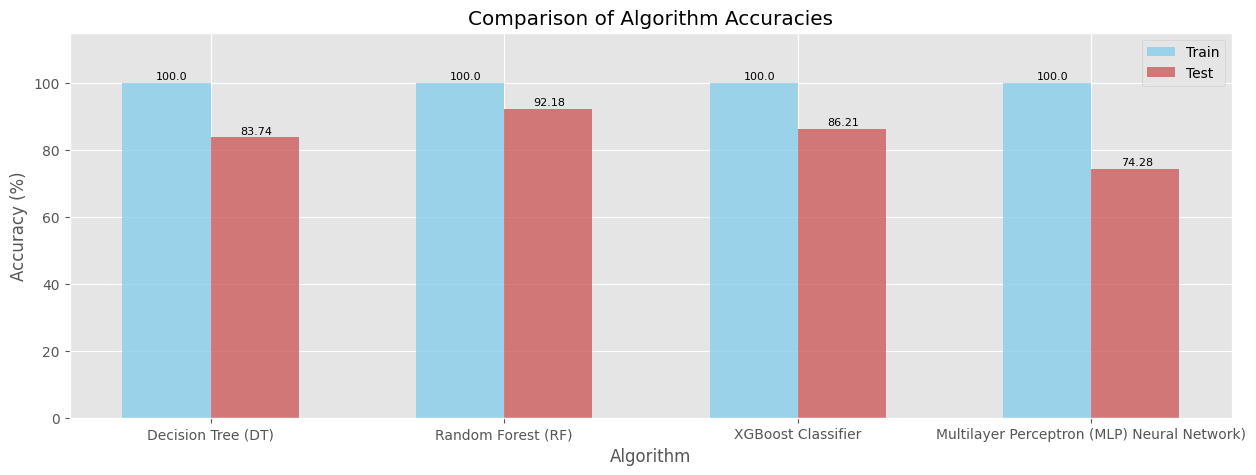

In [50]:
# data to plot
n_groups = 4
algorithms = ('Decision Tree (DT)', 'Random Forest (RF)','XGBoost Classifier', 'Multilayer Perceptron (MLP) Neural Network)')
train_accuracy = (accuracy_score(y_train, classifierDT.predict(X_train))*100, 
                  accuracy_score(y_train, classifierRF.predict(X_train))*100,
                  accuracy_score(y_train, classifierXGB.predict(X_train))*100,
                 accuracy_score(y_train, classifierMLP.predict(X_train))*100)
test_accuracy = (accuracy_score(y_test, y_predDT)*100, 
                 accuracy_score(y_test, y_predRF)*100,
                accuracy_score(y_test, y_predXGB)*100,
                accuracy_score(y_test, y_predMLP)*100)

# create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='SkyBlue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color='IndianRed', label='Test')
plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies') # plot title
plt.xticks(index + bar_width * 0.5, algorithms) # x axis data labels
plt.legend(loc = 'upper right') # show legend
for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
plt.show()

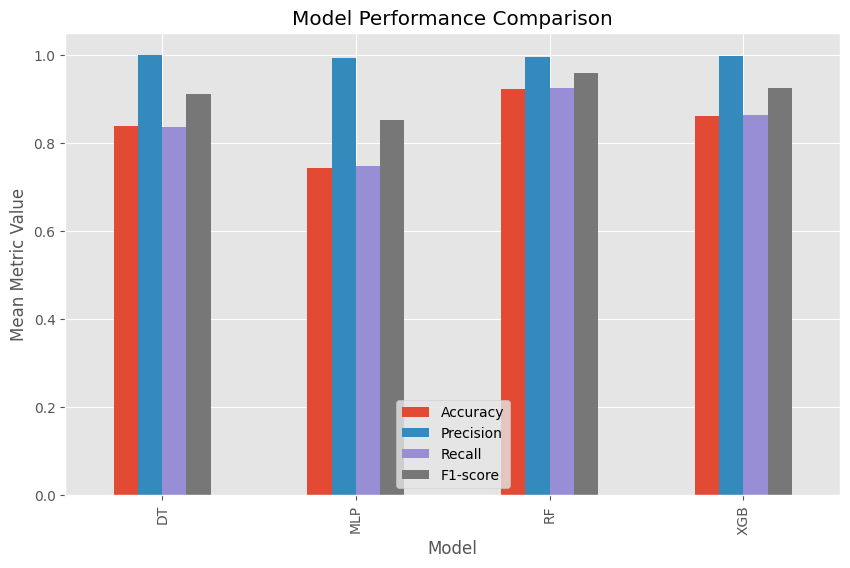

In [51]:
mean_metrics = comparision.groupby('Model').mean()

mean_metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Metric Value')
plt.show()

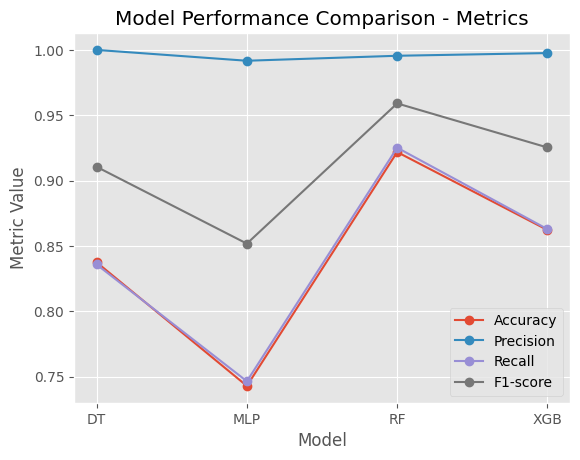

In [52]:
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
for metric in metric_names:
    plt.plot(mean_metrics.index, mean_metrics[metric], marker='o', label=metric)

plt.title('Model Performance Comparison - Metrics')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

<a id="6"></a>
<h3 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Conclusion</h3>

Accuracy measures how often the model is correct. Precision is the ratio of correctly predicted positive observations to the total predicted positives. Recall (Sensitivity) is the ratio of correctly predicted positive observations to all actual positives. F1-score is the weighted average of Precision and Recall.

Decision Tree (DT): High precision 100% indicates minimal false positives. Test accuracy and Recall is 84% is lower, indicating some missed positives. High F1-score 91% shows a good balance between precision and recall
.
Random Forest (RF): Highest accuracy 93%, indicating most correct predictions. High precision 99% with very few false positives. Highest recall and is 93%, indicating it identifies most positives. Highest F1-score 96%, showing the best balance between precision and recall
.
XGBoost (XGB): Higher accuracy 86% than DT but lower than RF. Nearly perfect precision 99%, similar to DT. Decent recall 86%, but not as high as RF. High F1-score 92%, indicating a good balance but not the be
st.
Multi-Layer Perceptron (MLP): Lowest accuracy 77%, indicating fewer correct predictions. Very high precision 99%, indicating few false positives. Lowest recall 78%, missing many positives. Lowest F1-score 87%, reflecting an imbalance between precision and rec
all.
Based on these metrics, the Random Forest (RF) model performs the best. It has the highest accuracy, indicating it makes the correct prediction most often. Its precision is very high, meaning it has a low rate of false positives. Its recall is also the highest, showing it’s best at identifying all positive samples. Finally, its F1-score is the highest, which means it has the best balance between precision and recall, making it the most reliable model among the four for this dataset and pro
blem.
In conclusion, the DT model using the criterion of entropy, and the minimum number of 2 leaves, is chosen as the best model for the prediction of disease diagnosis.


<a id="6"></a>
<h3 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Comaprision of Models Using Cross-Validation Scores</h3>

In [53]:
from sklearn.model_selection import cross_val_score
import pandas as pd

models = [
    ('Decision Trees', classifierDT),
    ('Random Forest', classifierRF),
    ('XGB Classifier', classifierXGB),
    ('Multilayer Perceptron (MLP)', classifierMLP)
]

cv_scores = []
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores)

cv_scores_df = pd.DataFrame(cv_scores, columns=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
cv_scores_df['Model'] = [name for name, _ in models]

cv_scores_df['Average'] = cv_scores_df.iloc[:, :-1].mean(axis=1)

print(cv_scores_df)


   Fold 1  Fold 2  Fold 3  Fold 4  Fold 5                        Model  \
0     1.0     1.0     1.0     1.0     1.0               Decision Trees   
1     1.0     1.0     1.0     1.0     1.0                Random Forest   
2     1.0     1.0     1.0     1.0     1.0               XGB Classifier   
3     1.0     1.0     1.0     1.0     1.0  Multilayer Perceptron (MLP)   

   Average  
0      1.0  
1      1.0  
2      1.0  
3      1.0  


In [54]:
from sklearn.model_selection import cross_val_score
import pandas as pd

models = [
    ('Decision Trees', classifierDT),
    ('Random Forest', classifierRF),
    ('XGB Classifier', classifierXGB),
    ('Multilayer Perceptron (MLP)', classifierMLP)
]

cv_scores = []
for name, model in models:
    scores = cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy')
    cv_scores.append(scores)

cv_scores_df = pd.DataFrame(cv_scores, columns=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
cv_scores_df['Model'] = [name for name, _ in models]

cv_scores_df['Average'] = cv_scores_df.iloc[:, :-1].mean(axis=1)

print(cv_scores_df)


     Fold 1    Fold 2    Fold 3    Fold 4    Fold 5  \
0  0.959184  0.969072  0.989691  0.989691  0.979381   
1  0.989796  0.989691  0.989691  0.989691  0.989691   
2  0.989796  0.989691  0.989691  0.989691  0.989691   
3  0.989796  0.989691  0.989691  0.989691  0.989691   

                         Model   Average  
0               Decision Trees  0.977404  
1                Random Forest  0.989712  
2               XGB Classifier  0.989712  
3  Multilayer Perceptron (MLP)  0.989712  


- Plot box plots of the cross-validation scores :

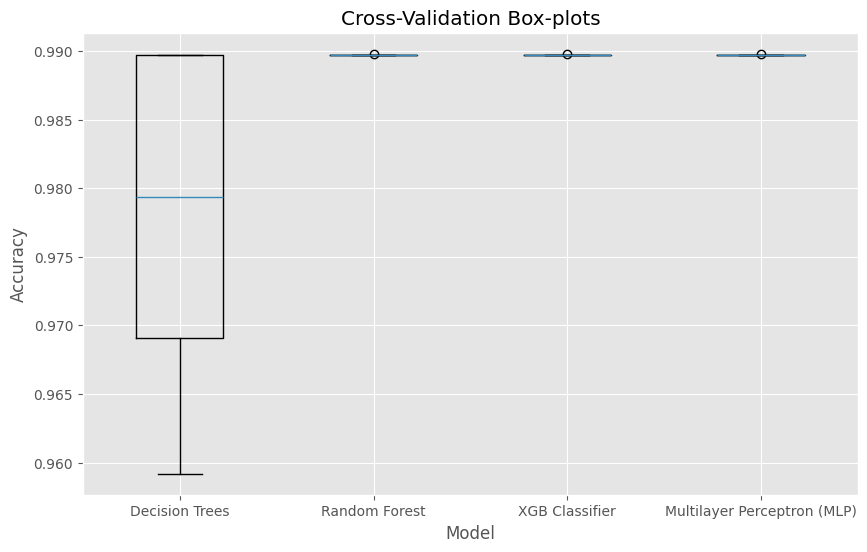

In [55]:
plt.figure(figsize=(10, 6))
plt.boxplot(cv_scores, labels=[name for name, _ in models])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Box-plots')
plt.show()

- After cross validation we can now confirm that RF model has the best performance metrics, thus best model and the chosen model for task

<a id="6"></a>
<h3 style="background-color:White;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Model Interpretation</h3>

<h3 style="color:Black;font-family:newtimeroman;font-size:100%;">

<div style="border-radius:10px; padding: 15px; background-color: White; font-size:120%; text-align:left">

The final crucial step of a data science project is the interpretation of the models and data, in terms of its predictive power and thus its ability to generalise unseen future data.

Feature engineering will involve feature selection based on higher feature importance towards the chosen model. This yields a subset of features from the original set to better represent the data, thus enabling the machine learning algorithm to train faster and reducing the model's computational complexity and cost. The model can also be easier to interpret and become more comprehendible to humans, and in some cases achive improved accuracy when the right subset is chosen. 

The feature importance of each symptom is identified and fully listed below.sion, the RF model using the parameter of best split, the criterion of entropy, and the minimum number of 2 leaves, is chosen as the best model for the prediction of disease diagnosis.

</h3>
</div>

In [56]:
# identify the important features in RF
imp = classifierRF.feature_importances_
imp

array([0.019278  , 0.02325037, 0.01927586, 0.09660295, 0.05184667,
       0.06307929, 0.0346836 , 0.10276422, 0.10181499, 0.05366095,
       0.05373083, 0.02203103, 0.03400765, 0.01626823, 0.02310536,
       0.01524344, 0.03138384, 0.03667604, 0.04508135, 0.01961313,
       0.06719426, 0.0222491 , 0.02152041, 0.02563843])

In [57]:
# combine list of symptoms and their feature importance into a 2D array
columns = df_train.columns[:24]
column_names = ['symptom', 'importance']
ed1_train = np.vstack((columns, imp)).T
ed1_train = pd.DataFrame(ed1_train, columns = column_names)
ed1_train

symptom importance
0                       Glucose   0.019278
1                   Cholesterol    0.02325
2                    Hemoglobin   0.019276
3                     Platelets   0.096603
4             White_Blood_Cells   0.051847
5               Red_Blood_Cells   0.063079
6                    Hematocrit   0.034684
7                     MC_Volume   0.102764
8                 MC_Hemoglobin   0.101815
9   MC_Hemoglobin_Concentration   0.053661
10                      Insulin   0.053731
11                          BMI   0.022031
12      Systolic_Blood_Pressure   0.034008
13     Diastolic_Blood_Pressure   0.016268
14                Triglycerides   0.023105
15                        HbA1c   0.015243
16              LDL_Cholesterol   0.031384
17              HDL_Cholesterol   0.036676
18                          ALT   0.045081
19                          AST   0.019613
20                   Heart_Rate   0.067194
21                   Creatinine   0.022249
22                     Troponin    0.02152
23           C-reactive_Protein   0.025638

Taking all of these into consideration, a minimum threshold for feature importance is set in order to identify features of low importance, and thus can be excluded from the final predictive model.

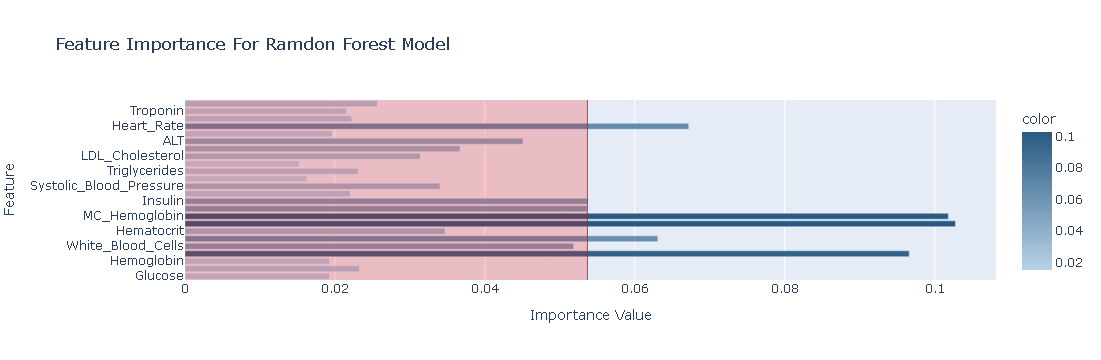

In [58]:
coefficients = classifierRF.feature_importances_

# set a minimum threshold for feature importance
importance_threshold = np.quantile(coefficients, q = 0.75)
import plotly.express as px

# barplot of feature importance
fig = px.bar(x = coefficients, y = columns, orientation = 'h', color = coefficients, 
             color_continuous_scale = [(0, '#b7d2e8'), (1, '#295981')], labels = {'x': "Importance Value", 'y': "Feature"}, 
             title = "Feature Importance For Ramdon Forest Model")

# cut off value as the minimum threshold for feature importance
fig.add_vline(x = importance_threshold, line_color = 'red', line_width = 0.8)
fig.add_vrect(x0 = importance_threshold, x1 = 0, line_width = 0, fillcolor = 'red', opacity = 0.2)
fig.show()

In [59]:
import numpy
# identify features with feature importance values below the minimum threshold
highest_importance_features = numpy.array(ed1_train.symptom[np.abs(coefficients) <= importance_threshold])
columns = list(highest_importance_features)
columns

['Glucose',
 'Cholesterol',
 'Hemoglobin',
 'White_Blood_Cells',
 'Hematocrit',
 'MC_Hemoglobin_Concentration',
 'BMI',
 'Systolic_Blood_Pressure',
 'Diastolic_Blood_Pressure',
 'Triglycerides',
 'HbA1c',
 'LDL_Cholesterol',
 'HDL_Cholesterol',
 'ALT',
 'AST',
 'Creatinine',
 'Troponin',
 'C-reactive_Protein']

The symptom of 'MC_Hemoglobin' is found to have the significantly largest predictive power of 0.09736, out of all the 25 predictors.

On the other hand, the low importance features are identified below.

In [60]:
import numpy
# identify features with feature importance values below the minimum threshold
low_importance_features = numpy.array(ed1_train.symptom[np.abs(coefficients) <= importance_threshold])
columns = list(low_importance_features)
columns

['Glucose',
 'Cholesterol',
 'Hemoglobin',
 'White_Blood_Cells',
 'Hematocrit',
 'MC_Hemoglobin_Concentration',
 'BMI',
 'Systolic_Blood_Pressure',
 'Diastolic_Blood_Pressure',
 'Triglycerides',
 'HbA1c',
 'LDL_Cholesterol',
 'HDL_Cholesterol',
 'ALT',
 'AST',
 'Creatinine',
 'Troponin',
 'C-reactive_Protein']

These low importance features are dropped.

In [61]:
for i in columns :
    # drop low importance features
    df_train.drop(i, axis=1, inplace=True)
    df_test.drop(i, axis=1, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platelets        2351 non-null   float64
 1   Red_Blood_Cells  2351 non-null   float64
 2   MC_Volume        2351 non-null   float64
 3   MC_Hemoglobin    2351 non-null   float64
 4   Insulin          2351 non-null   float64
 5   Heart_Rate       2351 non-null   float64
 6   target           2351 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 128.7 KB


In [62]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platelets        486 non-null    float64
 1   Red_Blood_Cells  486 non-null    float64
 2   MC_Volume        486 non-null    float64
 3   MC_Hemoglobin    486 non-null    float64
 4   Insulin          486 non-null    float64
 5   Heart_Rate       486 non-null    float64
 6   target           486 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 26.7 KB


The final datasets contains 6 columns of predictors, out of the original 25. These are fed into the RF model with the parameter of the criterion of entropy, and the minimum number of 2 leaves. The performance metrics of test accuracy, precision, recall, and F1-score are measured again for this new model. 

In [63]:
# split dataset into attributes and labels
X_train_ = df_train.iloc[:, :-1].values # the training attributes
y_train_ = df_train.iloc[:, 6].values # the training labels
X_test_ = df_test.iloc[:, :-1].values # the testing attributes
y_test_ = df_test.iloc[:, 6].values # the testing labels

# using RF classifier on information gain
classifierRF = RandomForestClassifier(criterion='entropy', min_samples_leaf=2)
classifierRF.fit(X_train_, y_train_)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2)

In [64]:
# for RF model

y_predRF = classifierRF.predict(X_test_)

print("Ramdon Forest:")
RF_accuracy = accuracy_score(y_test_, y_predRF)
RF_precision = precision_score(y_test_, y_predRF)
RF_recall = recall_score(y_test_, y_predRF)
RF_f1 = f1_score(y_test_, y_predRF)

print("\nAccuracy:", RF_accuracy)
print("\nPrecision:", RF_precision)
print("\nRecall:", RF_recall)
print("\nF1-score:", RF_f1)

# using confusion matrix
print(classification_report(y_test, y_predRF))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train_, classifierRF.predict(X_train_)))
print("Test Accuracy: ", accuracy_score(y_test_, y_predRF))

Ramdon Forest:

Accuracy: 0.8251028806584362

Precision: 0.9974874371859297

Recall: 0.8253638253638254

F1-score: 0.9032992036405005
              precision    recall  f1-score   support

           0       0.05      0.80      0.09         5
           1       1.00      0.83      0.90       481

    accuracy                           0.83       486
   macro avg       0.52      0.81      0.49       486
weighted avg       0.99      0.83      0.89       486

Train Accuracy:  1.0
Test Accuracy:  0.8251028806584362


<h3 style="color:Black;font-family:newtimeroman;font-size:100%;">

<div style="border-radius:10px; padding: 15px; background-color: White; font-size:120%; text-align:left">

RF model has NOT improved performance metrics of 83% test accuracy and recall, and 99% precision and 90% F1-score. Thus, all the diseases are perfectly classified and predicted, and the small difference of 0.17% between the train and test accuracy indicates this RF model suffers from neither overfitting nor underfitting. 

In conclusion, the RF model using the parameter t, the criterion of entropy, and the minimum number of 2 leaves, is chosen as the final model for the prediction of disease prognosis using 6 predictors of symptoms.

RF model is now ready to be deployed to predict new value instances. To do so, a data frame is created to describe the characteristics of a number of disease cases based on the symptoms. These new data instances will be passed to RF model classifier to predict its target class label of disease prognosis.

</h3>
</div>

In [65]:
# Reverse the 'category_mapping' dictionary to map back from numerical labels to class names
reverse_class_labels = {v: k for k, v in category_mapping.items()}

In [66]:
# new data on 6 attributes
newdata = [[1, 0, 0, 0, 1, 0 ]]

# compute probabilities of assigning to each of the classes of prognosis
probaRF = classifierRF.predict_proba(newdata)
probaRF.round(4) # round probabilities to four decimal places, if applicable

array([[0.49, 0.51]])

In [67]:
# Get the index of the class with the highest probability
predicted_index = np.argmax(probaRF[0])

# Map the index back to the class label
predicted_class = reverse_class_labels[predicted_index]

# Create a one-hot encoded array of zeros with length equal to the number of classes
one_hot_encoded_features = np.zeros(len(category_mapping))

# Set the index corresponding to the predicted class to 1
one_hot_encoded_features[category_mapping[predicted_class]] = 1

In [68]:
# Output the one-hot encoded array and the predicted class label
print("One-hot encoded features:\n", one_hot_encoded_features.reshape(1, -1))
print("\nPredicted class label:\n", np.array([predicted_class], dtype=object))

One-hot encoded features:
 [[0. 1. 0. 0. 0. 0.]]

Predicted class label:
 ['Thromboc']


<h3 style="color:Black;font-family:newtimeroman;font-size:100%;">

<div style="border-radius:10px; padding: 15px; background-color: White; font-size:120%; text-align:left">

The first number, 0.49, indicates there is a 49% chance that the new data belongs to the first class. The second number, 0.51, indicates there is an 83% chance that the new data belongs to the second class. 

In essence, the classifier is 51% confident that the new data point should be classified into the second class. This is a significant probability, suggesting that, according to the model’s learned patterns from the training data, the new data point is much more likely to be associated with the characteristics of the second class than the first one.

The predicted class for the specified example is assigned as "Thromboc", as its probability is the highest among that for the other classes of diseases. It is also safe to intepret this result as having 95% accuracy and recall, and 94% precision and F1-score, based on the RF model's performance metrics.

Possible improvements can be to include other strong predictors of diseasdiarognosis, such as other symptoms outside of the aforementi ne2532. These predictors can be very relevant and thus useful to include in the model design.

</h3>
</div>

## **Thank you !**